# Assignment Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


The company wants to know:

- Which variables are significant in predicting the price of a house

- How well those variables describe the price of a house.



# Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 1. Data Understanding 

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Looking at DataFrame Shape
df.shape

(1460, 81)

In [5]:
#Checking for column data types and if null values are present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Observation

DataFrame is filled with both categorical and numerical data type columns

In [6]:
# Looking the statistical distribution of column
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
#checking for null values
df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [8]:
# Columns having null values
df.isnull().any().value_counts()

False    62
True     19
dtype: int64

In [9]:
#19 columns have null values in themm

# 2. Data Cleaning

In [10]:
# Looking at the column names
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
df.shape

(1460, 81)

In [12]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
# Dropping "Id" because it is basically the index column
df.drop("Id", axis=1, inplace=True)

In [14]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
#Looking at missing value percentage of columns

missingPercentage = df.isnull().sum() / df.shape[0] * 100.00
missingPercentage.sort_values(ascending=False).head(20) # We know there are 19 columns with NULL values

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtCond         2.534247
BsmtQual         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
MSSubClass       0.000000
dtype: float64

### NOTE

- There are columns where absence of data is actually meaningfull and simply indicates the lack of that feature.

- Filling "None" for the NAs of those columns


In [16]:
col_with_meaningful_NA = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu","GarageQual", "GarageType", "GarageFinish", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [17]:
# There are 14 columns where NA actually means the absence of the feature and not absence of data
len(col_with_meaningful_NA)

14

In [18]:
for col in col_with_meaningful_NA:
    df[col]=df[col].fillna("None")

In [19]:
missingPercentage = df.isnull().sum() / df.shape[0] * 100.00
missingPercentage.sort_values(ascending=False).head(10) 

LotFrontage     17.739726
GarageYrBlt      5.547945
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
GrLivArea        0.000000
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
FullBath         0.000000
HalfBath         0.000000
dtype: float64

## Handling LotFrontage --> Linear feet of street connected to property

In [20]:
df.LotFrontage.isnull().sum()

259

In [21]:
df.LotFrontage.head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

In [22]:
df.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

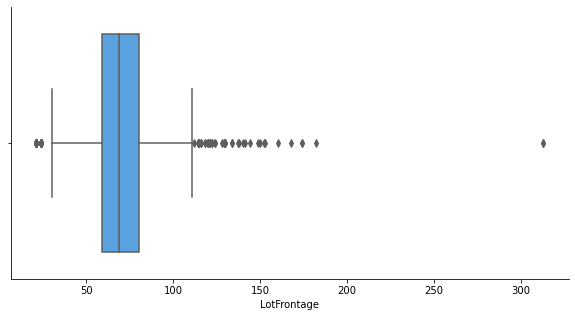

In [23]:
fig = plt.figure(figsize=(10, 5))

sns.boxplot(df.LotFrontage,color = "#43A4F5")
sns.despine()
plt.show()

In [24]:
# Since there are lot outliers in the Data and missing value count is significant, it is best to drop the column

df.drop("LotFrontage", axis=1, inplace=True)

In [25]:
# ------------------------------------------------------------------------------

In [26]:
missingPercentage = df.isnull().sum() / df.shape[0] * 100.00
missingPercentage.sort_values(ascending=False).head(7) 

GarageYrBlt     5.547945
MasVnrArea      0.547945
MasVnrType      0.547945
Electrical      0.068493
GrLivArea       0.000000
BsmtFullBath    0.000000
BsmtHalfBath    0.000000
dtype: float64

## Handling GarageYrBlt --> Year garage was built

In [27]:
df.GarageYrBlt.isnull().sum()

81

In [28]:
df.GarageYrBlt.head(3)

0    2003.0
1    1976.0
2    2001.0
Name: GarageYrBlt, dtype: float64

In [29]:
df.GarageYrBlt.describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

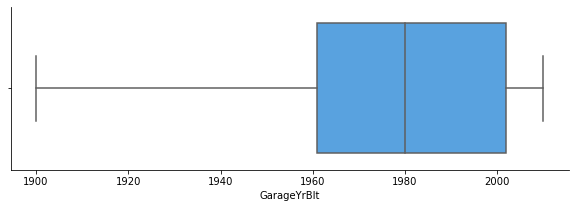

In [30]:
fig = plt.figure(figsize=(10, 3))

sns.boxplot(df.GarageYrBlt,color = "#43A4F5")
sns.despine()
plt.show()

In [31]:
df.GarageYrBlt.value_counts().head(10)

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29
Name: GarageYrBlt, dtype: int64

In [32]:
df[df.GarageYrBlt>2000].shape

(375, 79)

In [33]:
df[df.GarageYrBlt<=2000].shape

(1004, 79)

### Observation 

Not enough data to confidently impute the column with a specific year. But we do have a slight idea about the era

It is 2021 and any garage build more than 20 years ago can be termed old. Therefore, imputing GarageYrBlt NA values with 0, as it is likely to have been built before the 2000.

Therefore, 0 indicates the garage was build sometime in the 1900s (1900-1999) and then we will create a derive column later. 

In [34]:
df.GarageYrBlt = df.GarageYrBlt.fillna(0)

In [35]:
# ------------------------------------------------------------------------------

In [36]:
missingPercentage = df.isnull().sum() / df.shape[0] * 100.00
missingPercentage.sort_values(ascending=False).head(5) 

MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
GarageFinish    0.000000
GarageType      0.000000
dtype: float64

## Handling MasVnrType --> Masonry veneer type

In [37]:
df.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [38]:
df.MasVnrType.isnull().sum()

8

In [39]:
# Imputing with Mode

df.MasVnrType = df.MasVnrType.fillna("None")

In [40]:
df.MasVnrType.value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [41]:
# ------------------------------------------------------------------------------

In [42]:
missingPercentage = df.isnull().sum() / df.shape[0] * 100.00
missingPercentage.sort_values(ascending=False).head(5) 

MasVnrArea     0.547945
Electrical     0.068493
MSSubClass     0.000000
GarageYrBlt    0.000000
GarageType     0.000000
dtype: float64

# Handling MasVnrArea --> Masonry veneer area in square feet

In [43]:
df.MasVnrArea.isnull().sum()

8

In [44]:
df.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

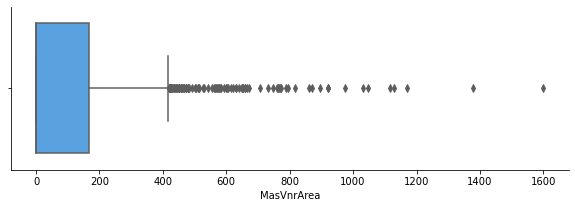

In [45]:
fig = plt.figure(figsize=(10, 3))

sns.boxplot(df.MasVnrArea,color = "#43A4F5")
sns.despine()
plt.show()

In [46]:
df.MasVnrArea.value_counts()

0.0      861
108.0      8
72.0       8
180.0      8
16.0       7
        ... 
31.0       1
366.0      1
528.0      1
894.0      1
415.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [47]:
# Median = Mode for MasVnrArea. Therefore, safe to impute with median

df.MasVnrArea = df.MasVnrArea.fillna(df.MasVnrArea.median())

In [48]:
# ------------------------------------------------------------------------------

In [49]:
missingPercentage = df.isnull().sum() / df.shape[0] * 100.00
missingPercentage.sort_values(ascending=False).head(5) 

Electrical      0.068493
GarageCars      0.000000
GarageFinish    0.000000
GarageYrBlt     0.000000
GarageType      0.000000
dtype: float64

In [50]:
# Handling Electrical --> Electrical system

In [51]:
df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [52]:
df.Electrical.isnull().sum()

1

In [53]:
# Safe to impute one value with the mode
df.Electrical = df.Electrical.fillna("SBrkr")

In [54]:
# ------------------------------------------------------------------------------

In [55]:
df.isnull().sum().sort_values(ascending=False)

MSSubClass      0
KitchenAbvGr    0
GarageYrBlt     0
GarageType      0
FireplaceQu     0
               ..
ExterQual       0
MasVnrArea      0
MasVnrType      0
Exterior2nd     0
SalePrice       0
Length: 79, dtype: int64

In [56]:
missingPercentage = df.isnull().sum() / df.shape[0] * 100.00
missingPercentage.sort_values(ascending=False).head(3)

MSSubClass      0.0
KitchenAbvGr    0.0
GarageYrBlt     0.0
dtype: float64

## Observation
No more null values present in the dataset

# Treating MSSSubClass 

- MSSubClass: Identifies the type of dwelling involved in the sale.
- It is wrongly treated as numerical datatype but it is actual a categorical datatype

In [57]:
df.MSSubClass = df.MSSubClass.map({20:'1-STORY 1946 & NEWER ALL STYLES',
        30:'1-STORY 1945 & OLDER',
        40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

In [58]:
df.MSSubClass.value_counts()

1-STORY 1946 & NEWER ALL STYLES                          536
2-STORY 1946 & NEWER                                     299
1-1/2 STORY FINISHED ALL AGES                            144
1-STORY PUD (Planned Unit Development) - 1946 & NEWER     87
1-STORY 1945 & OLDER                                      69
2-STORY PUD - 1946 & NEWER                                63
2-STORY 1945 & OLDER                                      60
SPLIT OR MULTI-LEVEL                                      58
DUPLEX - ALL STYLES AND AGES                              52
2 FAMILY CONVERSION - ALL STYLES AND AGES                 30
SPLIT FOYER                                               20
2-1/2 STORY ALL AGES                                      16
1-1/2 STORY - UNFINISHED ALL AGES                         12
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                   10
1-STORY W/FINISHED ATTIC ALL AGES                          4
Name: MSSubClass, dtype: int64

# Handling skewed Columns or Disproportional Columns

In [59]:
df.BsmtCond.value_counts()

TA      1311
Gd        65
Fa        45
None      37
Po         2
Name: BsmtCond, dtype: int64

In [60]:
df.GarageCond.value_counts()

TA      1326
None      81
Fa        35
Gd         9
Po         7
Ex         2
Name: GarageCond, dtype: int64

### Obsevation 

We can observe that a lot many columns above have skewed values, i.e., their most frequent value in heavily dominates the column. For eg: GarageCond's is heavily dominated by "TA" where more 90% is "TA". We need to remove such columns as they can impair our model

In [61]:
df.shape

(1460, 79)

In [62]:
# 0.7 * 1460 = 1022. Therefore, if top category value_counts>1000, we delete it

In [63]:
def removeSkewedCol (col):
    topValueCount = df[col].value_counts()[0]
    length = len(df[col].value_counts())
    if(topValueCount>1000 or length<2):
        print(col)
        df.drop(col, axis=1, inplace=True)

In [64]:
colNames = df.select_dtypes(include=['object']).columns

In [65]:
for col in colNames:
    removeSkewedCol(col)

MSZoning
Street
Alley
LandContour
Utilities
LotConfig
LandSlope
Condition1
Condition2
BldgType
RoofStyle
RoofMatl
ExterCond
BsmtCond
BsmtFinType2
Heating
CentralAir
Electrical
Functional
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


## Removing columns with only one value

In [66]:
def removeSingleValue (col):
    length = len(df[col].value_counts())
    if(length<2):
        print(col)
        df.drop(col, axis=1, inplace=True)

for col in df.columns:
    removeSingleValue(col)

## Adding derived Columns

In [67]:
# IsRemodelled - This column would determine whether the house has been remodelled or not based on 
# the difference between remodelled and built years

def remodel(row):
    if(row['YearRemodAdd'] == row['YearBuilt']):
        return 0
    elif(row['YearRemodAdd'] > row['YearBuilt']):
        return 1
    else:
        return 2
    
df['IsRemodelled'] = df.apply(remodel, axis=1)
df.head()    

,MSSubClass,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,IsRemodelled
0,2-STORY 1946 & NEWER,8450,Reg,CollgCr,2Story,7,5,2003,2003,VinylSd,...,61,0,0,0,0,0,2,2008,208500,0
1,1-STORY 1946 & NEWER ALL STYLES,9600,Reg,Veenker,1Story,6,8,1976,1976,MetalSd,...,0,0,0,0,0,0,5,2007,181500,0
2,2-STORY 1946 & NEWER,11250,IR1,CollgCr,2Story,7,5,2001,2002,VinylSd,...,42,0,0,0,0,0,9,2008,223500,1
3,2-STORY 1945 & OLDER,9550,IR1,Crawfor,2Story,7,5,1915,1970,Wd Sdng,...,35,272,0,0,0,0,2,2006,140000,1
4,2-STORY 1946 & NEWER,14260,IR1,NoRidge,2Story,8,5,2000,2000,VinylSd,...,84,0,0,0,0,0,12,2008,250000,0


In [68]:
# Create a new column named age and get the age of the building at the time of sale

def age(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
df['BuiltOrRemodelAge'] = df.apply(age, axis=1)
df.head()  

,MSSubClass,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,IsRemodelled,BuiltOrRemodelAge
0,2-STORY 1946 & NEWER,8450,Reg,CollgCr,2Story,7,5,2003,2003,VinylSd,...,0,0,0,0,0,2,2008,208500,0,5
1,1-STORY 1946 & NEWER ALL STYLES,9600,Reg,Veenker,1Story,6,8,1976,1976,MetalSd,...,0,0,0,0,0,5,2007,181500,0,31
2,2-STORY 1946 & NEWER,11250,IR1,CollgCr,2Story,7,5,2001,2002,VinylSd,...,0,0,0,0,0,9,2008,223500,1,6
3,2-STORY 1945 & OLDER,9550,IR1,Crawfor,2Story,7,5,1915,1970,Wd Sdng,...,272,0,0,0,0,2,2006,140000,1,36
4,2-STORY 1946 & NEWER,14260,IR1,NoRidge,2Story,8,5,2000,2000,VinylSd,...,0,0,0,0,0,12,2008,250000,0,8


In [69]:
# Create a new column which would indicate if the Garage is old or new.
# Garage Yr Built less than 2000 will be considered as old (0) else new(1). 
# For GarageYrBuilt , where we have imputed the value as 0 will also be treated as old.

def garageOldNew(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
df['OldOrNewGarage'] = df['GarageYrBlt'].apply(garageOldNew)
df.head() 

,MSSubClass,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,2-STORY 1946 & NEWER,8450,Reg,CollgCr,2Story,7,5,2003,2003,VinylSd,...,0,0,0,0,2,2008,208500,0,5,1
1,1-STORY 1946 & NEWER ALL STYLES,9600,Reg,Veenker,1Story,6,8,1976,1976,MetalSd,...,0,0,0,0,5,2007,181500,0,31,0
2,2-STORY 1946 & NEWER,11250,IR1,CollgCr,2Story,7,5,2001,2002,VinylSd,...,0,0,0,0,9,2008,223500,1,6,1
3,2-STORY 1945 & OLDER,9550,IR1,Crawfor,2Story,7,5,1915,1970,Wd Sdng,...,0,0,0,0,2,2006,140000,1,36,0
4,2-STORY 1946 & NEWER,14260,IR1,NoRidge,2Story,8,5,2000,2000,VinylSd,...,0,0,0,0,12,2008,250000,0,8,1


In [70]:
# Since we have created new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt, we can drop these columns as we 
# would only be using the derived columns for further analysis

df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [71]:
# Check if there are any duplicate values in the dataset

df[df.duplicated(keep=False)]

,MSSubClass,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,Exterior1st,Exterior2nd,MasVnrType,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage


In [72]:
df.isnull().sum().sort_values(ascending=False).head() 

MSSubClass      0
GarageArea      0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
dtype: int64

In [73]:
# Therefore, there are no null value columns

## Handling Outliers

In [74]:
num_col = list(df.dtypes[df.dtypes !='object'].index)

In [75]:
num_col

['LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SalePrice',
 'IsRemodelled',
 'BuiltOrRemodelAge',
 'OldOrNewGarage']

In [76]:
df.shape

(1460, 51)

In [77]:
num_col = list(df.dtypes[df.dtypes !='object'].index)


def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

df = drop_outliers(df)

In [78]:
df.shape

(1440, 51)

### Observation:
20 rows identified as Outliers using Inter-Quartile-Range method and removed

In [79]:
# Removing Single Value Columns
def removeSingleValue (col):
    length = len(df[col].value_counts())
    if(length<2):
        print(col)
        df.drop(col, axis=1, inplace=True)

for col in df.columns:
    removeSingleValue(col)

PoolArea


In [80]:
# DataFrame shape before Univariate and Bivariate Analysis
df.shape

(1440, 50)

# 3. Exploratory Data Analysis

## Univariate Analysis

In [81]:
eda = df.copy()

In [82]:
eda.columns

Index(['MSSubClass', 'LotArea', 'LotShape', 'Neighborhood', 'HouseStyle',
       'OverallQual', 'OverallCond', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MiscVal', 'MoSold', 'SalePrice', 'IsRemodelled',
       'BuiltOrRemodelAge', 'OldOrNewGarage'],
      dtype='object')

In [83]:
numerical_col = list(eda.dtypes[eda.dtypes !='object'].index)

In [84]:
categorical_col = list(eda.dtypes[eda.dtypes == "object"].index)

In [85]:
len(categorical_col)

17

In [86]:
categorical_col

['MSSubClass',
 'LotShape',
 'Neighborhood',
 'HouseStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish']

In [87]:
len(numerical_col)

33

In [88]:
# Few numerical cols 
numerical_col[0:8]

['LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF']

In [89]:
def annotate_graph(ax):
       
    for bar in ax.patches: 
        ax.annotate(format((bar.get_height()), '.1f'),  
                   (bar.get_x() + bar.get_width() / 2,  bar.get_height()), 
                   ha='center', va='center', 
                   size=10, xytext=(0, 8), 
                   textcoords='offset points')
    return ax

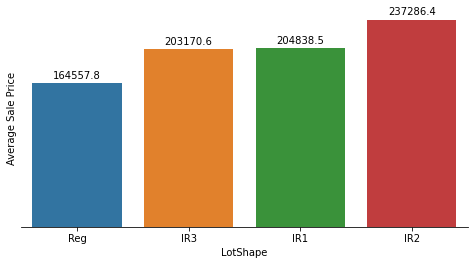

In [90]:
plt.figure(figsize=(8,4))
myOrder = ["Reg","IR3", "IR1", "IR2"]
ax = sns.barplot(x = eda.LotShape, y=eda.SalePrice, estimator=np.mean, ci=None, order = myOrder)

ax = annotate_graph(ax)

plt.ylabel('Average Sale Price')
plt.xlabel('LotShape')
plt.yticks([], [])
sns.despine(left=True)

plt.show()

### Observation

- Reg	Regular	
- IR1	Slightly irregular
- IR2	Moderately Irregular
- IR3	Irregular

Moderately Irregular shape of plot has higher average sale price

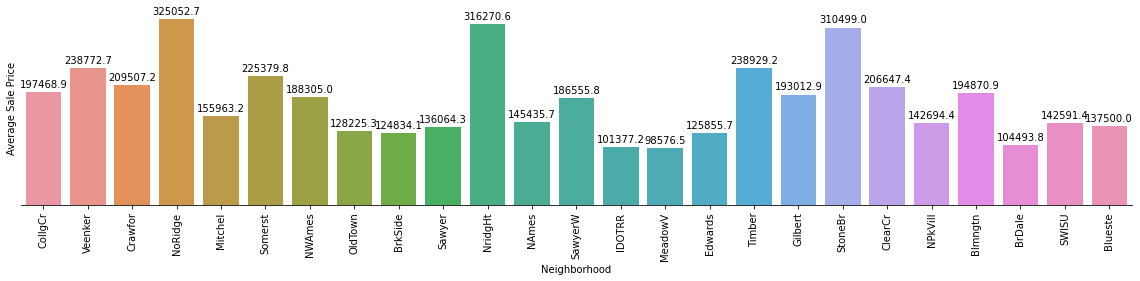

In [91]:
plt.figure(figsize=(16,4))
ax = sns.barplot(x = eda.Neighborhood, y=eda.SalePrice, estimator=np.mean, ci=None)

ax = annotate_graph(ax)

plt.ylabel('Average Sale Price')
plt.xlabel('Neighborhood')
plt.yticks([], [])
sns.despine(left=True)
plt.xticks(rotation="vertical")

plt.tight_layout()
plt.show()

### Observation

- Northridge, Northridge Heights and Stone Brook have high sale price
- Iowa DOT and Rail Road, Meadow Village and Briardale have low sale price

In [92]:
df.HouseStyle.value_counts()

1Story    718
2Story    439
1.5Fin    150
SLvl       63
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

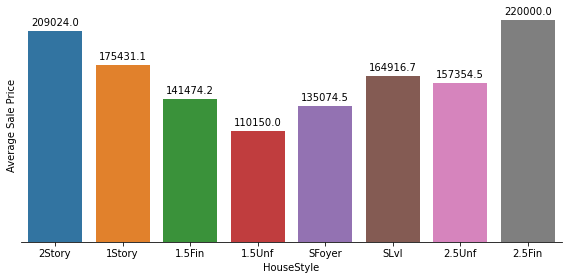

In [93]:
plt.figure(figsize=(8,4))
# myOrder = ["Reg","IR3", "IR1", "IR2"]
ax = sns.barplot(x = eda.HouseStyle, y=eda.SalePrice, estimator=np.mean, ci=None)

ax = annotate_graph(ax)

plt.ylabel('Average Sale Price')
plt.xlabel('HouseStyle')
plt.yticks([], [])
sns.despine(left=True)

plt.tight_layout()
plt.show()

### Observation

- 1Story	One story
- 1.5Fin	One and one-half story: 2nd level finished
- 1.5Unf	One and one-half story: 2nd level unfinished
- 2Story	Two story
- 2.5Fin	Two and one-half story: 2nd level finished
- 2.5Unf	Two and one-half story: 2nd level unfinished
- SFoyer	Split Foyer
- SLvl	    Split Level


2.5Fin and 2Story are the highest selling house types


### Creating Bins for Numerical Variables

In [94]:
eda['LotArea_bins'] = pd.qcut(eda.LotArea, 4, labels=["low", "medium", "high", "very high"])

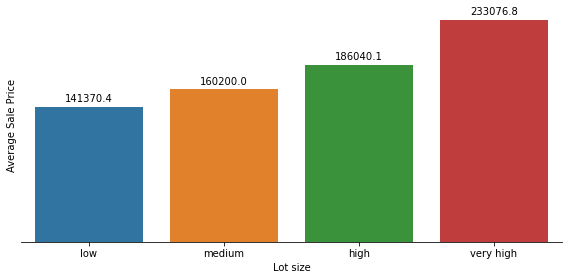

In [95]:
plt.figure(figsize=(8,4))
# myOrder = ["Reg","IR3", "IR1", "IR2"]
ax = sns.barplot(x = eda.LotArea_bins, y=eda.SalePrice, estimator=np.mean, ci=None)

ax = annotate_graph(ax)

plt.ylabel('Average Sale Price')
plt.xlabel('Lot size')
plt.yticks([], [])
sns.despine(left=True)

plt.tight_layout()
plt.show()

In [96]:
# TotalBsmtSF

eda['TotalBsmtSF_bins'] = pd.qcut(eda.TotalBsmtSF, 4, labels=["low", "medium", "high", "very high"])

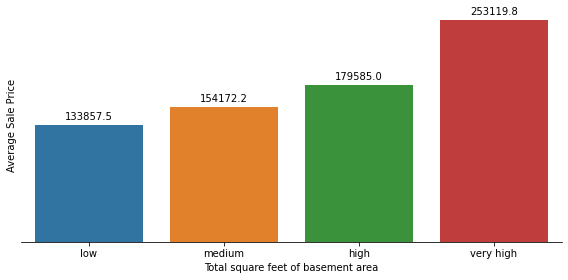

In [97]:
plt.figure(figsize=(8,4))

ax = sns.barplot(x = eda.TotalBsmtSF_bins, y=eda.SalePrice, estimator=np.mean, ci=None)

ax = annotate_graph(ax)

plt.ylabel('Average Sale Price')
plt.xlabel('Total square feet of basement area')
plt.yticks([], [])
sns.despine(left=True)

plt.tight_layout()
plt.show()

### Observation

- Price increases as Total square feet of basement area increases
- Price increases as Lot size in square feet increases

## Bivariate Analysis

In [98]:
numerical_col = list(eda.dtypes[eda.dtypes !='object'].index)
numerical_col


['LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'MoSold',
 'SalePrice',
 'IsRemodelled',
 'BuiltOrRemodelAge',
 'OldOrNewGarage',
 'LotArea_bins',
 'TotalBsmtSF_bins']

In [99]:
pairPlotList = ["BuiltOrRemodelAge", "GarageArea", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF","SalePrice"]

[]

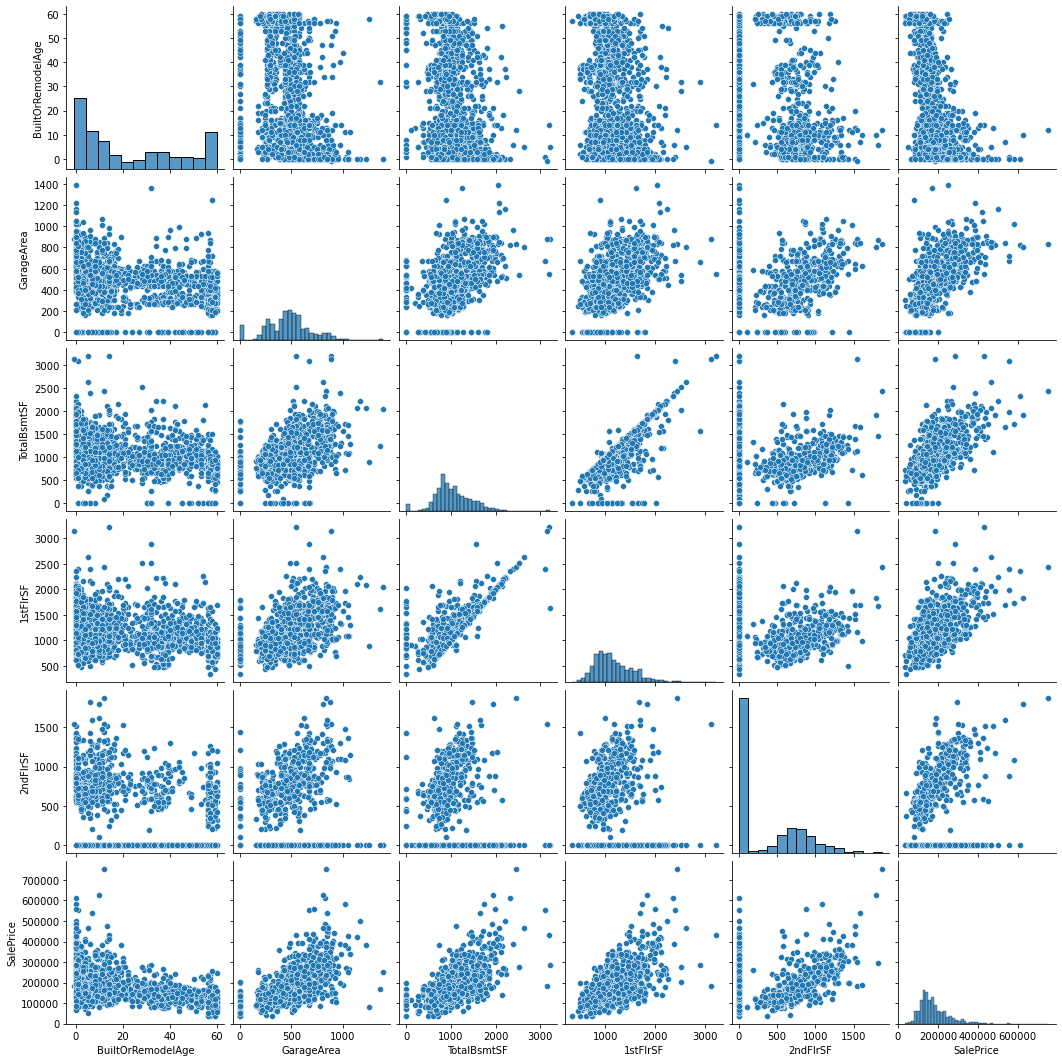

In [100]:
sns.pairplot(eda[pairPlotList])
plt.plot()

### Observation

- SalePrice is directly proportional to GarageArea, Total Basement Surface, First Floor etc. 

- As BuiltOrRemodelAge increases, SalePrice decreases

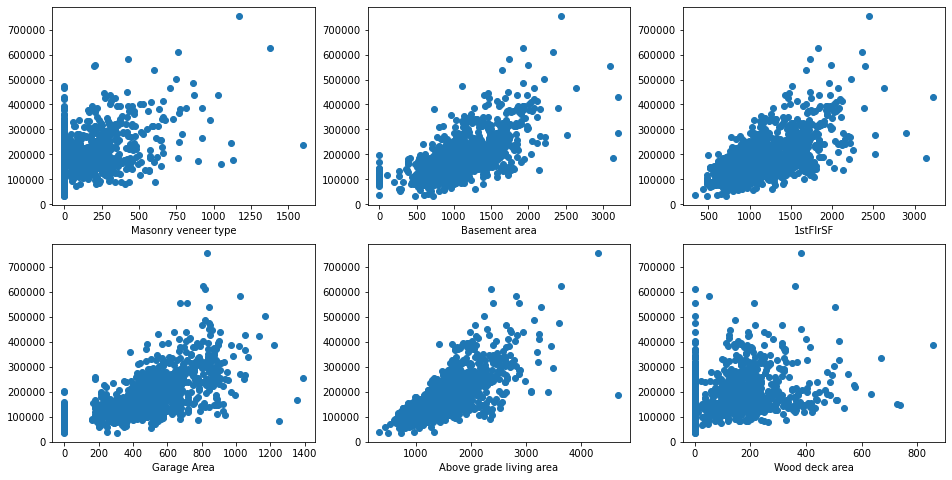

In [101]:
plt.figure(figsize=(16,8))

plt.subplot(2,3,1)
plt.scatter(df.MasVnrArea,df.SalePrice)
plt.xlabel('Masonry veneer type')

plt.subplot(2,3,2)
plt.scatter(df.TotalBsmtSF,df.SalePrice)
plt.xlabel('Basement area')

plt.subplot(2,3,3)
plt.scatter(df['1stFlrSF'],df.SalePrice)
plt.xlabel('1stFlrSF')

plt.subplot(2,3,4)
plt.scatter(df['GarageArea'],df.SalePrice)
plt.xlabel('Garage Area')

plt.subplot(2,3,5)
plt.scatter(df['GrLivArea'],df.SalePrice)
plt.xlabel('Above grade living area')


plt.subplot(2,3,6)
plt.scatter(df['WoodDeckSF'],df.SalePrice)
plt.xlabel('Wood deck area')

plt.show()
# fig.tight_layout()

### Observations :
    - 1stFlrSF, Basement Area, Above Grade Living Area seems to be showing correlation towards right
    - Rest of the variables are too scattered and hence can be understood during further analysis

In [102]:
ba1 = pd.pivot_table(data=eda, index="TotalBsmtSF_bins", columns="LotArea_bins", values="SalePrice")

In [103]:
ba2 = pd.pivot_table(data=eda, index="HouseStyle", columns="LotArea_bins", values="SalePrice")

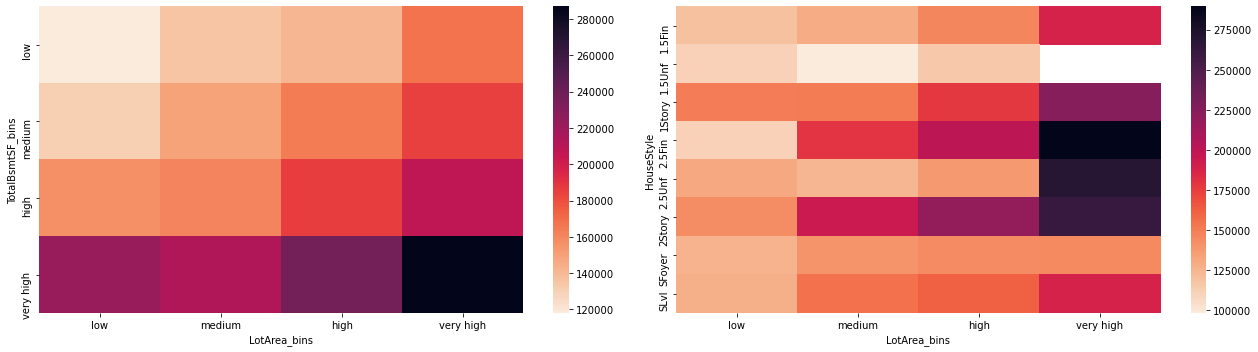

In [104]:
# fig, axes = plt.subplots(2, 2, figsize=(18, 5), sharey=False)
fig = plt.figure(figsize=(18, 5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)




sns.heatmap(ax=ax1,data=ba1, annot=False, cmap=sns.cm.rocket_r)
sns.heatmap(ax=ax2,data=ba2, annot=False, cmap=sns.cm.rocket_r)



plt.tight_layout()

plt.show()

### Observation

As Lot Area and Basement Area increases, price increases and 2.5Unf, 2.5Fin and 2Story have the highest selling price

In [105]:
eda.columns

Index(['MSSubClass', 'LotArea', 'LotShape', 'Neighborhood', 'HouseStyle',
       'OverallQual', 'OverallCond', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MiscVal', 'MoSold', 'SalePrice', 'IsRemodelled',
       'BuiltOrRemodelAge', 'OldOrNewGarage', 'LotArea_bins',
       'TotalBsmtSF_bins'],
      dtype='object')

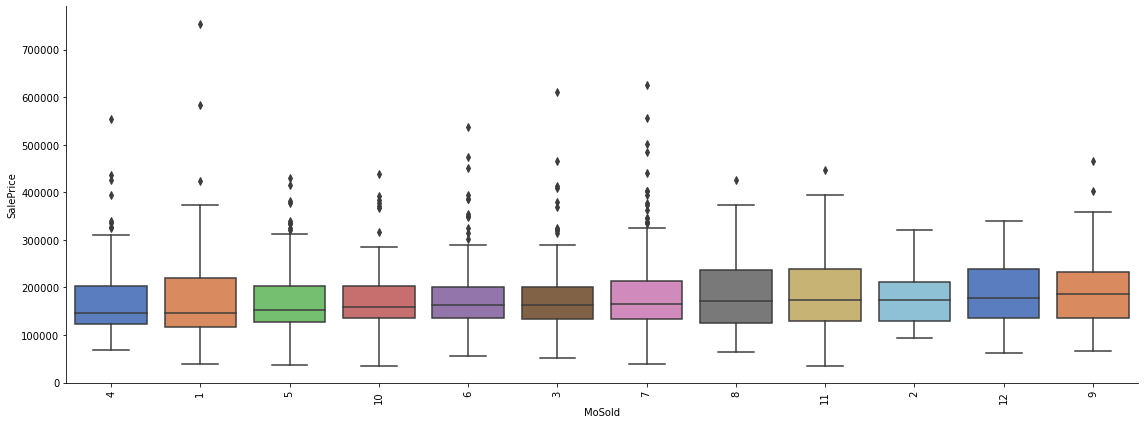

In [106]:
fig = plt.figure(figsize=(16, 6))

grouped = df.loc[:,['MoSold', 'SalePrice']].groupby(['MoSold']).median().sort_values(by='SalePrice')

sns.boxplot(x="MoSold", y="SalePrice", data=eda, palette="muted",order=grouped.index)

plt.xticks(rotation="vertical")
plt.tight_layout()
sns.despine()
plt.show()

## Observation

- July sees the highest outliers in price
- September sees the highest Median Sale Price
- April sees the lowest Median Sale Price

## Multivariate Analysis

In [107]:
numerical_col

['LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'MoSold',
 'SalePrice',
 'IsRemodelled',
 'BuiltOrRemodelAge',
 'OldOrNewGarage',
 'LotArea_bins',
 'TotalBsmtSF_bins']

[]

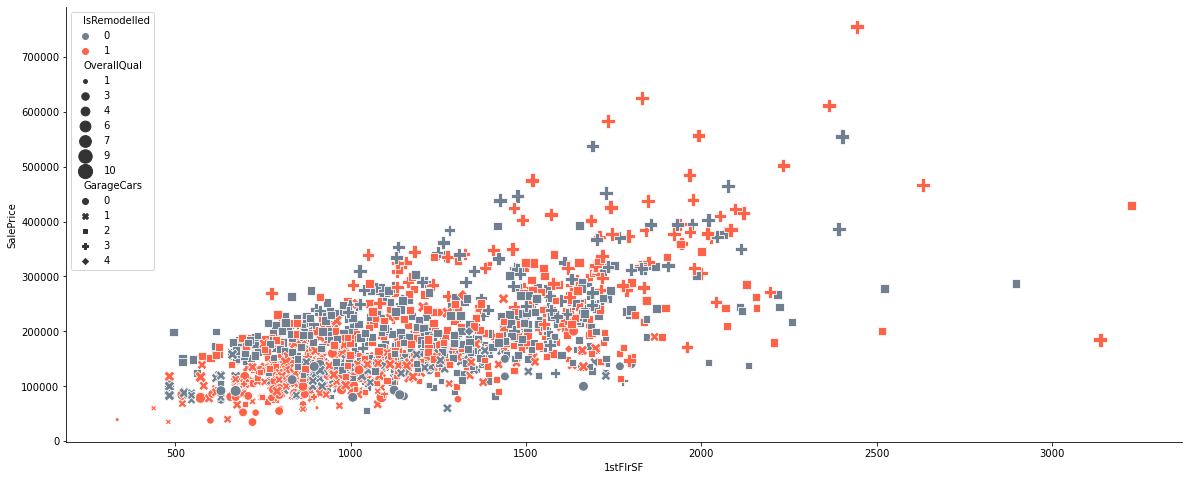

In [108]:
fig = plt.figure(figsize=(20, 8))

sns.scatterplot(x="1stFlrSF", y="SalePrice", hue="IsRemodelled", 
                data=eda, style="GarageCars",size="OverallQual", sizes=(15, 200),
                palette=["slategrey","tomato"] )

sns.despine()

plt.plot()

### Observation:
- Non-remodelled houses sell "reasonably" well too
- 3 Garage cars are very popular among buyers
- Price increases as 1st Floor surface area increases

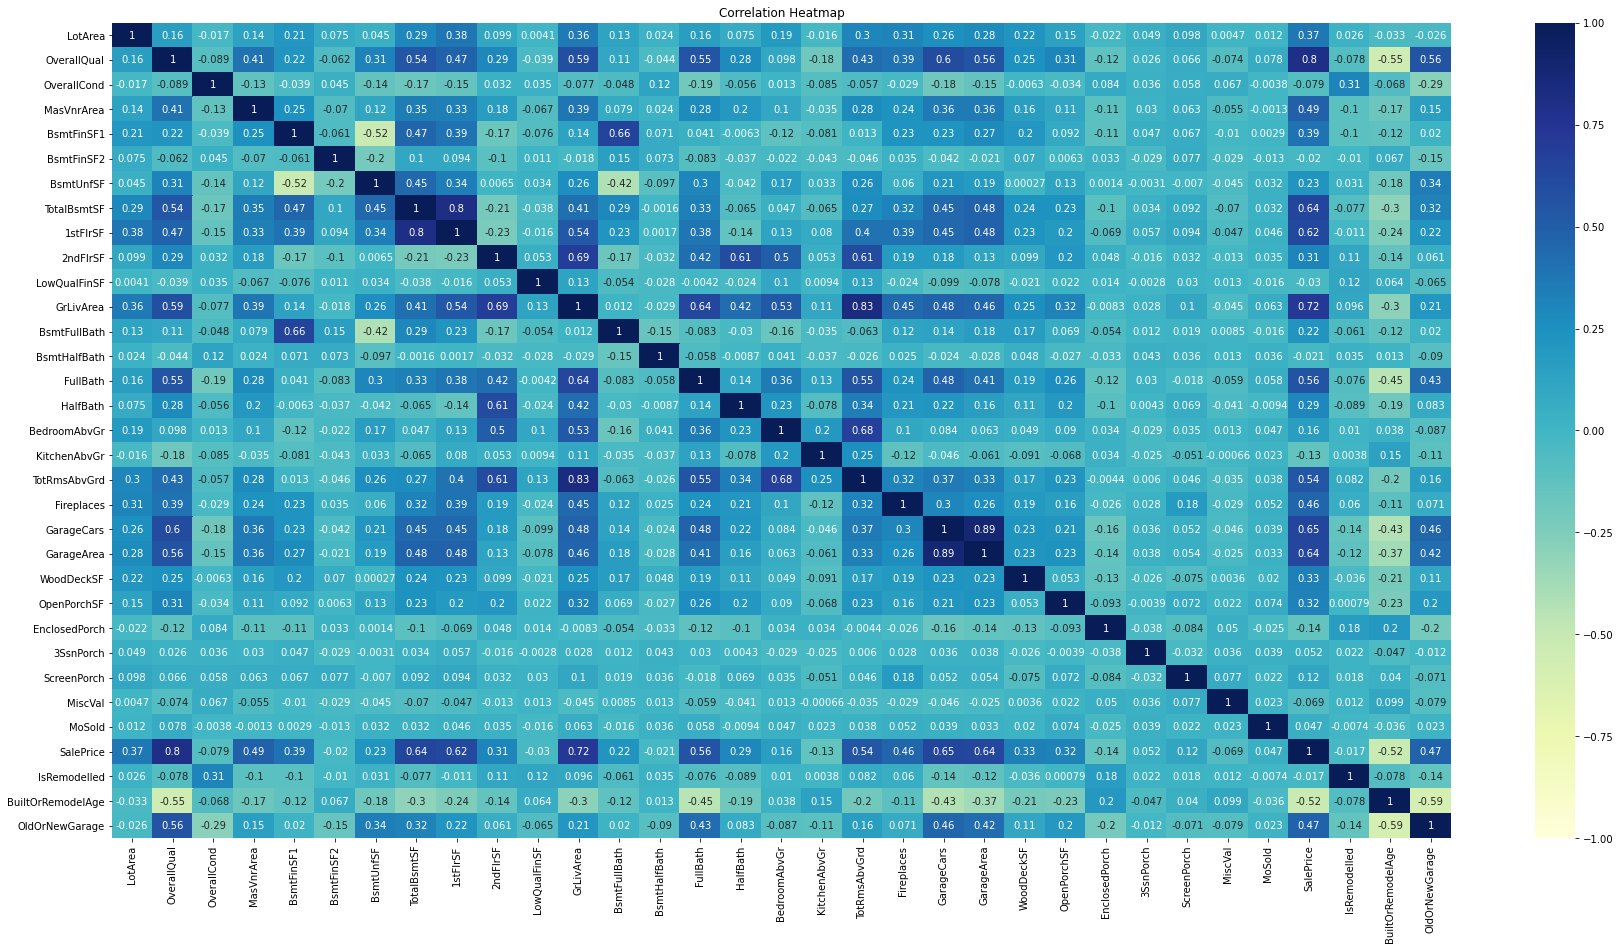

In [109]:
# plot heat map to see correlation between features
plt.figure(figsize=(30,15))
myData = eda.corr()

sns.heatmap(myData,vmin=-1.0,vmax=1.0,annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

# Few highly correlated pairs:

- GrLivArea: Above grade (ground) living area square feet and TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Sale Price and OverallQual
- Sale Price and GarageArea and Garage Cars

# 4. Data Preparation

In [110]:
colNames = df.select_dtypes(include=['object']).columns

In [111]:
colNames

Index(['MSSubClass', 'LotShape', 'Neighborhood', 'HouseStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'FireplaceQu', 'GarageType', 'GarageFinish'],
      dtype='object')

In [112]:
len(colNames)

17

In [113]:
# Since the values of the following fields are ordered list, we shall assign values to them in sequence

# For values which can be ordered, we have given an ordered sequence value
# For values which cannot be ordered, we have categorised them into 0 and 1

df['dummy_LotShape'] = df['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
df['dummy_ExterQual'] = df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
df['dummy_BsmtQual'] = df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['dummy_BsmtExposure'] = df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
df['dummy_BsmtFinType1'] = df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0})
df['dummy_HeatingQC'] = df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['dummy_KitchenQual'] = df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['dummy_GarageFinish'] = df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
df['dummy_HouseStyle'] = df['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
df['dummy_MasVnrType'] = df['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })

In [114]:
# drop the old columns from which the new columns were derived
# We can also drop the id column as it will not be used any more

df = df.drop(['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
              'KitchenQual', 'GarageFinish', 'HouseStyle', 'MasVnrType'], axis=1)

df.head()

,MSSubClass,LotArea,Neighborhood,OverallQual,OverallCond,Exterior1st,Exterior2nd,MasVnrArea,Foundation,BsmtFinSF1,...,dummy_LotShape,dummy_ExterQual,dummy_BsmtQual,dummy_BsmtExposure,dummy_BsmtFinType1,dummy_HeatingQC,dummy_KitchenQual,dummy_GarageFinish,dummy_HouseStyle,dummy_MasVnrType
0,2-STORY 1946 & NEWER,8450,CollgCr,7,5,VinylSd,VinylSd,196.0,PConc,706,...,3,4,4,1,6,5,4,2,4,1
1,1-STORY 1946 & NEWER ALL STYLES,9600,Veenker,6,8,MetalSd,MetalSd,0.0,CBlock,978,...,3,3,4,4,5,5,3,2,1,0
2,2-STORY 1946 & NEWER,11250,CollgCr,7,5,VinylSd,VinylSd,162.0,PConc,486,...,2,4,4,2,6,5,4,2,4,1
3,2-STORY 1945 & OLDER,9550,Crawfor,7,5,Wd Sdng,Wd Shng,0.0,BrkTil,216,...,2,3,3,1,5,4,4,1,4,0
4,2-STORY 1946 & NEWER,14260,NoRidge,8,5,VinylSd,VinylSd,350.0,PConc,655,...,2,4,4,3,6,5,4,2,4,1


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1440 entries, 0 to 1459
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MSSubClass          1440 non-null   object 
 1   LotArea             1440 non-null   int64  
 2   Neighborhood        1440 non-null   object 
 3   OverallQual         1440 non-null   int64  
 4   OverallCond         1440 non-null   int64  
 5   Exterior1st         1440 non-null   object 
 6   Exterior2nd         1440 non-null   object 
 7   MasVnrArea          1440 non-null   float64
 8   Foundation          1440 non-null   object 
 9   BsmtFinSF1          1440 non-null   int64  
 10  BsmtFinSF2          1440 non-null   int64  
 11  BsmtUnfSF           1440 non-null   int64  
 12  TotalBsmtSF         1440 non-null   int64  
 13  1stFlrSF            1440 non-null   int64  
 14  2ndFlrSF            1440 non-null   int64  
 15  LowQualFinSF        1440 non-null   int64  
 16  GrLivA

In [116]:
# For the following columns create dummies

# MSSubClass Dummy
d_MSSubClass = pd.get_dummies(df['MSSubClass'], prefix='MSSubClass', drop_first = True)
df = pd.concat([df, d_MSSubClass], axis = 1)


# Creating dummies for Neighborhood

d_Neighborhood = pd.get_dummies(df['Neighborhood'], prefix='Neighborhood', drop_first = True)
df = pd.concat([df, d_Neighborhood], axis = 1)


# Creating dummies for Exterior1st

d_Exterior1st = pd.get_dummies(df['Exterior1st'], prefix='Exterior1st', drop_first = True)
df = pd.concat([df, d_Exterior1st], axis = 1)

# Creating dummies for Exterior2nd

d_Exterior2nd = pd.get_dummies(df['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
df = pd.concat([df, d_Exterior2nd], axis = 1)

# Creating dummies for Foundation

d_Foundation = pd.get_dummies(df['Foundation'], prefix='Foundation', drop_first = True)
df = pd.concat([df, d_Foundation], axis = 1)

# Creating dummies for GarageType

d_GarageType = pd.get_dummies(df['GarageType'], prefix='GarageType', drop_first = True)
df = pd.concat([df, d_GarageType], axis = 1)

# Creating dummy for FireplaceQu

d_FireplaceQu = pd.get_dummies(df['FireplaceQu'], prefix='FireplaceQu', drop_first = True)
df = pd.concat([df, d_FireplaceQu], axis = 1)


df.head()

,MSSubClass,LotArea,Neighborhood,OverallQual,OverallCond,Exterior1st,Exterior2nd,MasVnrArea,Foundation,BsmtFinSF1,...,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA
0,2-STORY 1946 & NEWER,8450,CollgCr,7,5,VinylSd,VinylSd,196.0,PConc,706,...,0,0,0,0,0,0,0,1,0,0
1,1-STORY 1946 & NEWER ALL STYLES,9600,Veenker,6,8,MetalSd,MetalSd,0.0,CBlock,978,...,0,0,0,0,0,0,0,0,0,1
2,2-STORY 1946 & NEWER,11250,CollgCr,7,5,VinylSd,VinylSd,162.0,PConc,486,...,0,0,0,0,0,0,0,0,0,1
3,2-STORY 1945 & OLDER,9550,Crawfor,7,5,Wd Sdng,Wd Shng,0.0,BrkTil,216,...,0,0,0,1,0,0,1,0,0,0
4,2-STORY 1946 & NEWER,14260,NoRidge,8,5,VinylSd,VinylSd,350.0,PConc,655,...,0,0,0,0,0,0,0,0,0,1


In [117]:
# drop the below columns as we now have new columns derived from these columns

df.drop(['Neighborhood', 'Exterior1st', 'Exterior2nd', 'Foundation', 'GarageType',"MSSubClass","FireplaceQu"], axis=1, inplace=True)

df.head()

,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA
0,8450,7,5,196.0,706,0,150,856,856,854,...,0,0,0,0,0,0,0,1,0,0
1,9600,6,8,0.0,978,0,284,1262,1262,0,...,0,0,0,0,0,0,0,0,0,1
2,11250,7,5,162.0,486,0,434,920,920,866,...,0,0,0,0,0,0,0,0,0,1
3,9550,7,5,0.0,216,0,540,756,961,756,...,0,0,0,1,0,0,1,0,0,0
4,14260,8,5,350.0,655,0,490,1145,1145,1053,...,0,0,0,0,0,0,0,0,0,1


In [118]:
df.select_dtypes(include=['int64','float','uint8'])

,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA
0,8450,7,5,196.0,706,0,150,856,856,854,...,0,0,0,0,0,0,0,1,0,0
1,9600,6,8,0.0,978,0,284,1262,1262,0,...,0,0,0,0,0,0,0,0,0,1
2,11250,7,5,162.0,486,0,434,920,920,866,...,0,0,0,0,0,0,0,0,0,1
3,9550,7,5,0.0,216,0,540,756,961,756,...,0,0,0,1,0,0,1,0,0,0
4,14260,8,5,350.0,655,0,490,1145,1145,1053,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,7500,7,5,0.0,410,0,811,1221,1221,0,...,0,0,0,0,0,0,0,1,0,0
1455,7917,6,5,0.0,0,0,953,953,953,694,...,0,0,0,0,0,0,0,0,0,1
1456,13175,6,6,119.0,790,163,589,1542,2073,0,...,0,0,0,0,0,0,0,0,0,1
1458,9717,5,6,0.0,49,1029,0,1078,1078,0,...,0,0,0,0,0,0,0,1,0,0


In [119]:
df.shape

(1440, 126)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1440 entries, 0 to 1459
Columns: 126 entries, LotArea to FireplaceQu_TA
dtypes: float64(1), int64(42), uint8(83)
memory usage: 644.0 KB


## Observation
All data types are numerical now

# Train-Test Split

In [121]:
# Putting all feature variable to X

X = df.drop(['SalePrice'], axis=1)
X.head()

,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA
0,8450,7,5,196.0,706,0,150,856,856,854,...,0,0,0,0,0,0,0,1,0,0
1,9600,6,8,0.0,978,0,284,1262,1262,0,...,0,0,0,0,0,0,0,0,0,1
2,11250,7,5,162.0,486,0,434,920,920,866,...,0,0,0,0,0,0,0,0,0,1
3,9550,7,5,0.0,216,0,540,756,961,756,...,0,0,0,1,0,0,1,0,0,0
4,14260,8,5,350.0,655,0,490,1145,1145,1053,...,0,0,0,0,0,0,0,0,0,1


In [122]:
# Putting response variable to y

y = df['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

### Note

There are 125 features

In [123]:
# split into train and test
df_train, df_test = train_test_split(df, train_size=0.7, test_size = 0.3, random_state=747)


### Dividing training dataset to X and Y for the model building
### Feature Scaling

In [124]:
# scaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
var = list(df_train.columns)
df_train[var] = scaler.fit_transform(df_train[var])

df_test[var] = scaler.transform(df_test[var])


In [125]:
#pop will remove the column and return it to y_train
y_train = df_train.pop("SalePrice")
X_train = df_train

y_test = df_test.pop("SalePrice")
X_test = df_test

In [126]:
X_train.head()

,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA
762,0.103205,0.666667,0.5,0.00000,0.010619,0.0,0.313356,0.235808,0.148583,0.418269,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
938,0.104937,0.666667,0.5,0.00000,0.205310,0.0,0.396832,0.433874,0.365238,0.305021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
730,0.056273,0.777778,0.5,0.00000,0.522124,0.0,0.177654,0.497505,0.442985,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
384,0.745142,0.555556,0.5,0.00000,0.435841,0.0,0.254709,0.492826,0.257429,0.466880,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
231,0.197012,0.777778,0.5,0.31625,0.304867,0.0,0.330908,0.456020,0.399447,0.696581,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Data Modelling

## Recursive Feature Elimination

- We will use RFE to remove 40% of columns
- 125 * 0.60 = 75
- We will keep 70 columns

In [127]:
# Creating the Linear Regression Model and running RFE to get top 87 columns

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 70)
ref = rfe.fit(X_train, y_train)

In [128]:
# Checking out the selected columns

top70 = X_train.columns[rfe.support_]
top70

Index(['LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', '3SsnPorch', 'ScreenPorch',
       'BuiltOrRemodelAge', 'dummy_ExterQual', 'dummy_BsmtQual',
       'dummy_BsmtExposure', 'dummy_KitchenQual', 'dummy_HouseStyle',
       'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       'MSSubClass_2-STORY 1945 & OLDER',
       'MSSubClass_2-STORY PUD - 1946 & NEWER',
       'MSSubClass_SPLIT OR MULTI-LEVEL', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_IDOTRR', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood

In [129]:
# Assign the 70 features to X_train_rfe

X_train_rfe = X_train[top70]

In [130]:
X_train_rfe

,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA
762,0.103205,0.666667,0.500,0.00000,0.010619,0.000000,0.313356,0.235808,0.148583,0.418269,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
938,0.104937,0.666667,0.500,0.00000,0.205310,0.000000,0.396832,0.433874,0.365238,0.305021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
730,0.056273,0.777778,0.500,0.00000,0.522124,0.000000,0.177654,0.497505,0.442985,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
384,0.745142,0.555556,0.500,0.00000,0.435841,0.000000,0.254709,0.492826,0.257429,0.466880,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
231,0.197012,0.777778,0.500,0.31625,0.304867,0.000000,0.330908,0.456020,0.399447,0.696581,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,0.089360,0.444444,0.625,0.00000,0.000000,0.000000,0.312928,0.228010,0.167934,0.279380,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1427,0.136264,0.444444,0.625,0.00000,0.256637,0.000000,0.142551,0.284779,0.246717,0.272436,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
470,0.076931,0.777778,0.500,0.00000,0.162832,0.759837,0.000000,0.464130,0.403594,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1411,0.117064,0.555556,0.875,0.00000,0.053097,0.000000,0.315068,0.266999,0.268832,0.297009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [131]:
# Associate the new 70 features to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

## Building StatsModel

In [132]:
# creating X_train dataframe with RFE selected top20 variables

X_train_rfe = X_train[top70]

In [133]:
import statsmodels.api as sm

#Adding constant
X_train_rfe = sm.add_constant(X_train_rfe)

In [134]:
#Running the model
lm = sm.OLS(y_train, X_train_rfe).fit()

In [135]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     111.7
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:10:10   Log-Likelihood:                 1900.3
No. Observations:                1007   AIC:                            -3667.
Df Residuals:                     940   BIC:                            -3337.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                               -0.0944      0.036     -2.657      0.008      -0.164      -0.025
LotArea                                                              0.0487      0.019      2.504      0.012       0.011       0.087
OverallQual                                                          0.1112      0.016      6.764      0.000       0.079       0.144
OverallCond                                                          0.0348      0.011      3.211      0.001       0.014       0.056
MasVnrArea                                                           0.0551      0.013      4.165      0.000       0.029       0.081
BsmtFinSF1                                                           0.0599      0.009      6.571      0.000       0.042       0.078
BsmtFinSF2                                                           0.0155      0.011      1.401      0.161      -0.006       0.037
BsmtUnfSF                                                            0.0094      0.009      1.088      0.277      -0.008       0.026
TotalBsmtSF                                                          0.0562      0.013      4.303      0.000       0.031       0.082
1stFlrSF                                                             0.0786      0.017      4.562      0.000       0.045       0.112
2ndFlrSF                                                             0.0838      0.012      7.105      0.000       0.061       0.107
LowQualFinSF                                                         0.0005      0.015      0.034      0.973      -0.029       0.030
GrLivArea                                                            0.0886      0.012      7.347      0.000       0.065       0.112
FullBath                                                             0.0211      0.011      1.846      0.065      -0.001       0.043
HalfBath                                                             0.0131      0.007      1.822      0.069      -0.001       0.027
BedroomAbvGr                                                        -0.0544      0.020     -2.782      0.006      -0.093      -0.016
KitchenAbvGr                                                        -0.0881      0.020     -4.354      0.000      -0.128      -0.048
TotRmsAbvGrd                                                         0.0476      0.021      2.249      0.025       0.006       0.089
Fireplaces                                                           0.0397      0.015      2.645      0.008       0.010       0.069
GarageCars                                                           0.0315      0.017      1.886      0.060      -0.001       0.064
GarageArea              

In [136]:
# Calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Defining a function to give VIF value
def vif_cal(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)

    vif = vif.sort_values(by="VIF", ascending=False)

    return vif

In [137]:
vif = vif_cal(X_train_rfe)
vif

,Features,VIF
9,1stFlrSF,inf
10,2ndFlrSF,inf
55,Exterior2nd_CBlock,inf
12,GrLivArea,inf
11,LowQualFinSF,inf
...,...,...
23,ScreenPorch,1.12
45,Neighborhood_Veenker,1.12
34,Neighborhood_Blueste,1.07
22,3SsnPorch,1.07


### Note: Priority of deleting columns

- High p-value, High VIF
- High p-value, Low VIF
- Low p-value, High VIF

## Dropping LowQualFinSF (p-value = 0.973)

In [138]:
# Dropping Mar and recreating model
X_train_rfe.drop("LowQualFinSF", axis=1, inplace=True)
lm = sm.OLS(y_train, X_train_rfe ).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     111.7
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:10:11   Log-Likelihood:                 1900.3
No. Observations:                1007   AIC:                            -3667.
Df Residuals:                     940   BIC:                            -3337.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [139]:
# Dropping Exterior1st_AsphShn... (p-value = 0.939)
dropCol = 'Exterior1st_AsphShn'
X_train_rfe.drop(dropCol, axis=1, inplace=True)

In [140]:
lm = sm.OLS(y_train, X_train_rfe ).fit()

In [141]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     111.7
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:10:11   Log-Likelihood:                 1900.3
No. Observations:                1007   AIC:                            -3667.
Df Residuals:                     940   BIC:                            -3337.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [142]:
X_train_rfe.columns

Index(['const', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', '3SsnPorch', 'ScreenPorch',
       'BuiltOrRemodelAge', 'dummy_ExterQual', 'dummy_BsmtQual',
       'dummy_BsmtExposure', 'dummy_KitchenQual', 'dummy_HouseStyle',
       'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       'MSSubClass_2-STORY 1945 & OLDER',
       'MSSubClass_2-STORY PUD - 1946 & NEWER',
       'MSSubClass_SPLIT OR MULTI-LEVEL', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_IDOTRR', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Veenke

In [143]:
# Dropping Exterior2nd_CBlock (p-value = 0.544)
dropCol = 'Exterior2nd_CBlock'
X_train_rfe.drop(dropCol, axis=1, inplace=True)

lm = sm.OLS(y_train, X_train_rfe ).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     111.7
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:10:11   Log-Likelihood:                 1900.3
No. Observations:                1007   AIC:                            -3667.
Df Residuals:                     940   BIC:                            -3337.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [144]:
# Dropping Exterior1st_CBlock (p-value = 0.67)
dropCol = 'Exterior1st_CBlock'
X_train_rfe.drop(dropCol, axis=1, inplace=True)

lm = sm.OLS(y_train, X_train_rfe ).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     113.5
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:10:11   Log-Likelihood:                 1900.1
No. Observations:                1007   AIC:                            -3668.
Df Residuals:                     941   BIC:                            -3344.
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [145]:
# Dropping GrLivArea (p-value = 0.465)
dropCol = 'GrLivArea'
X_train_rfe.drop(dropCol, axis=1, inplace=True)

lm = sm.OLS(y_train, X_train_rfe ).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     115.4
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:10:11   Log-Likelihood:                 1899.9
No. Observations:                1007   AIC:                            -3670.
Df Residuals:                     942   BIC:                            -3350.
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [146]:
# Dropping Neighborhood_Blueste
dropCol = 'Neighborhood_Blueste'
X_train_rfe.drop(dropCol, axis=1, inplace=True)

lm = sm.OLS(y_train, X_train_rfe ).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     117.2
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:10:11   Log-Likelihood:                 1899.6
No. Observations:                1007   AIC:                            -3671.
Df Residuals:                     943   BIC:                            -3357.
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [147]:
# Dropping Exterior1st_BrkComm
dropCol = 'Exterior1st_BrkComm'
X_train_rfe.drop(dropCol, axis=1, inplace=True)

lm = sm.OLS(y_train, X_train_rfe ).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     119.2
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:10:11   Log-Likelihood:                 1899.3
No. Observations:                1007   AIC:                            -3673.
Df Residuals:                     944   BIC:                            -3363.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [148]:
# Dropping Exterior1st_ImStucc
dropCol = 'Exterior1st_ImStucc'
X_train_rfe.drop(dropCol, axis=1, inplace=True)

lm = sm.OLS(y_train, X_train_rfe ).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     121.2
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:10:11   Log-Likelihood:                 1899.1
No. Observations:                1007   AIC:                            -3674.
Df Residuals:                     945   BIC:                            -3370.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [149]:
# Dropping Exterior2nd_Brk Cmn
dropCol = 'Exterior2nd_Brk Cmn'
X_train_rfe.drop(dropCol, axis=1, inplace=True)

lm = sm.OLS(y_train, X_train_rfe ).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     123.4
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:10:11   Log-Likelihood:                 1899.1
No. Observations:                1007   AIC:                            -3676.
Df Residuals:                     946   BIC:                            -3376.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [150]:
# Dropping Exterior2nd_AsphShn 
dropCol = 'Exterior2nd_AsphShn'
X_train_rfe.drop(dropCol, axis=1, inplace=True)

lm = sm.OLS(y_train, X_train_rfe ).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     125.5
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:10:11   Log-Likelihood:                 1898.8
No. Observations:                1007   AIC:                            -3678.
Df Residuals:                     947   BIC:                            -3383.
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [151]:
# Dropping Neighborhood_BrDale 
dropCol = 'Neighborhood_BrDale'
X_train_rfe.drop(dropCol, axis=1, inplace=True)

lm = sm.OLS(y_train, X_train_rfe ).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     127.6
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:10:11   Log-Likelihood:                 1898.2
No. Observations:                1007   AIC:                            -3678.
Df Residuals:                     948   BIC:                            -3388.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [152]:
# Dropping BsmtUnfSF 
dropCol = 'BsmtUnfSF'
X_train_rfe.drop(dropCol, axis=1, inplace=True)

lm = sm.OLS(y_train, X_train_rfe ).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     127.6
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:10:11   Log-Likelihood:                 1898.2
No. Observations:                1007   AIC:                            -3678.
Df Residuals:                     948   BIC:                            -3388.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [153]:
# Dropping Exterior1st_MetalSd 
dropCol = 'Exterior1st_MetalSd'
X_train_rfe.drop(dropCol, axis=1, inplace=True)

lm = sm.OLS(y_train, X_train_rfe ).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     129.9
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:10:11   Log-Likelihood:                 1897.8
No. Observations:                1007   AIC:                            -3680.
Df Residuals:                     949   BIC:                            -3394.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [154]:
# Dropping BsmtFinSF2 
dropCol = 'BsmtFinSF2'
X_train_rfe.drop(dropCol, axis=1, inplace=True)

lm = sm.OLS(y_train, X_train_rfe ).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     132.2
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:10:11   Log-Likelihood:                 1897.4
No. Observations:                1007   AIC:                            -3681.
Df Residuals:                     950   BIC:                            -3401.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [155]:

# Dropping GarageType_CarPort 
dropCol = 'GarageType_CarPort'
X_train_rfe.drop(dropCol, axis=1, inplace=True)

lm = sm.OLS(y_train, X_train_rfe ).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     134.5
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:10:11   Log-Likelihood:                 1896.6
No. Observations:                1007   AIC:                            -3681.
Df Residuals:                     951   BIC:                            -3406.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [156]:

# Dropping MSSubClass_SPLIT OR MULTI-LEVEL 
dropCol = 'MSSubClass_SPLIT OR MULTI-LEVEL'
X_train_rfe.drop(dropCol, axis=1, inplace=True)

lm = sm.OLS(y_train, X_train_rfe ).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     136.8
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:10:11   Log-Likelihood:                 1895.4
No. Observations:                1007   AIC:                            -3681.
Df Residuals:                     952   BIC:                            -3410.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [157]:

# Dropping GarageType_Attchd
dropCol = 'GarageType_Attchd'
X_train_rfe.drop(dropCol, axis=1, inplace=True)

lm = sm.OLS(y_train, X_train_rfe ).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     139.2
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:10:11   Log-Likelihood:                 1894.4
No. Observations:                1007   AIC:                            -3681.
Df Residuals:                     953   BIC:                            -3415.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [158]:

# Dropping GarageType_Basment
dropCol = 'GarageType_Basment'
X_train_rfe.drop(dropCol, axis=1, inplace=True)

lm = sm.OLS(y_train, X_train_rfe ).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     142.0
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:10:11   Log-Likelihood:                 1894.2
No. Observations:                1007   AIC:                            -3682.
Df Residuals:                     954   BIC:                            -3422.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [159]:

# Dropping 3SsnPorch
dropCol = '3SsnPorch'
X_train_rfe.drop(dropCol, axis=1, inplace=True)

lm = sm.OLS(y_train, X_train_rfe ).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     144.6
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:10:11   Log-Likelihood:                 1893.3
No. Observations:                1007   AIC:                            -3683.
Df Residuals:                     955   BIC:                            -3427.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [160]:


# Dropping Exterior2nd_MetalSd
dropCol = 'Exterior2nd_MetalSd'
X_train_rfe.drop(dropCol, axis=1, inplace=True)

lm = sm.OLS(y_train, X_train_rfe ).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     147.3
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:10:11   Log-Likelihood:                 1892.2
No. Observations:                1007   AIC:                            -3682.
Df Residuals:                     956   BIC:                            -3432.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [161]:


# Dropping GarageType_Detchd
dropCol = 'GarageType_Detchd'
X_train_rfe.drop(dropCol, axis=1, inplace=True)

lm = sm.OLS(y_train, X_train_rfe ).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     150.4
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:10:11   Log-Likelihood:                 1892.0
No. Observations:                1007   AIC:                            -3684.
Df Residuals:                     957   BIC:                            -3438.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [162]:
vif = vif_cal(X_train_rfe)
vif

,Features,VIF
0,const,311.69
47,FireplaceQu_None,25.57
46,FireplaceQu_Gd,13.46
49,FireplaceQu_TA,12.17
7,1stFlrSF,6.99
15,GarageCars,6.84
14,Fireplaces,6.70
6,TotalBsmtSF,6.61
8,2ndFlrSF,6.57
16,GarageArea,5.83


In [163]:
# Dropping FireplaceQu_None
dropCol = 'FireplaceQu_None'
X_train_rfe.drop(dropCol, axis=1, inplace=True)

lm = sm.OLS(y_train, X_train_rfe ).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     153.2
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:10:12   Log-Likelihood:                 1890.5
No. Observations:                1007   AIC:                            -3683.
Df Residuals:                     958   BIC:                            -3442.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

### Observation

- A lot many columns have been deleted manually by observing p-value and VIF
- Most of the VERY HIGH p-value cols have been removed but many still remain. 
- Such dataset highlights the importance of Lasso regression

In [164]:
X_train_rfe.drop("const", axis=1, inplace=True)

In [165]:
X_train_rfe.head()

,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,HalfBath,...,Exterior2nd_BrkFace,Exterior2nd_Wd Sdng,Foundation_Slab,Foundation_Wood,GarageType_BuiltIn,GarageType_None,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA
762,0.103205,0.666667,0.5,0.00000,0.010619,0.235808,0.148583,0.418269,0.666667,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
938,0.104937,0.666667,0.5,0.00000,0.205310,0.433874,0.365238,0.305021,0.666667,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
730,0.056273,0.777778,0.5,0.00000,0.522124,0.497505,0.442985,0.000000,0.666667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
384,0.745142,0.555556,0.5,0.00000,0.435841,0.492826,0.257429,0.466880,0.666667,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
231,0.197012,0.777778,0.5,0.31625,0.304867,0.456020,0.399447,0.696581,0.666667,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [166]:
# Associate the new features to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

# Residual Analysis

In [167]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [168]:
y_train_pred = lm.predict(X_train)

In [169]:
residual = y_train - y_train_pred

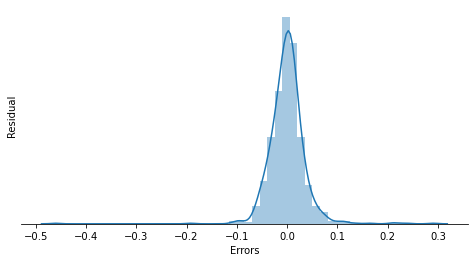

In [170]:
plt.figure(figsize=(8,4))
ax = sns.distplot(residual)


plt.ylabel('Residual')
plt.xlabel('Errors')
plt.yticks([])
sns.despine(left=True)

plt.show()

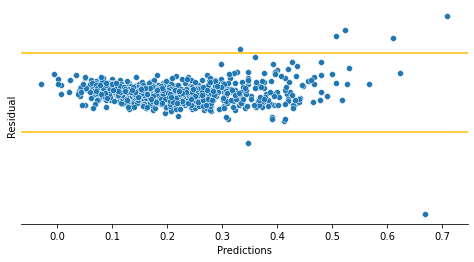

In [171]:
plt.figure(figsize=(8,4))
ax = sns.scatterplot(x=y_train_pred, y=residual)


plt.axhline(y=0.15, color='#FFBF00', linestyle='-')
plt.axhline(y=-0.15, color='#FFBF00', linestyle='-')

plt.ylabel('Residual')
plt.xlabel('Predictions')
plt.yticks([])
# plt.xticks([])
sns.despine(left=True)

plt.show()

### Observation:

- Residuals form a normal distribution with average around zero
- Residuals are independent of each other
- Residuals have constant variance

## Model Building and Evaluation

### RIDGE

In [172]:
# list of alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  #r2 can also be used (both give similar lambda in our case)
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.5s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [173]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=1000]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
12,1.0,-0.023647,-0.025590,1
11,0.9,-0.023631,-0.025595,2
13,2.0,-0.023825,-0.025596,3
10,0.8,-0.023618,-0.025601,4
9,0.7,-0.023607,-0.025611,5
8,0.6,-0.023599,-0.025627,6
7,0.5,-0.023592,-0.025645,7
14,3.0,-0.024019,-0.025651,8
6,0.4,-0.023587,-0.025667,9
5,0.3,-0.023587,-0.025692,10


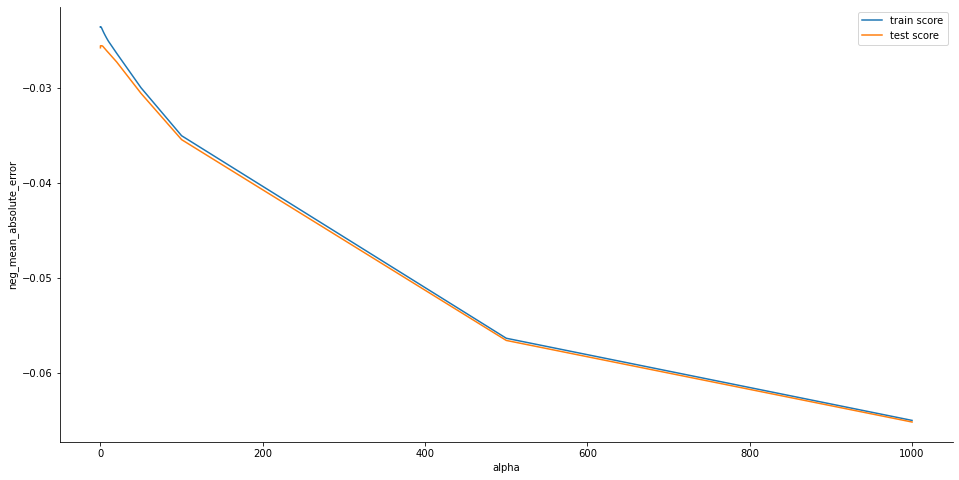

In [174]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('neg_mean_absolute_error')

sns.despine()
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [175]:
# get the best estimator for lambda

ridge_model_cv.best_params_

{'alpha': 1.0}

In [176]:
X_train.shape

(1007, 48)

In [177]:
# check the coefficient values with lambda = 1

ridge = Ridge(alpha=1)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.04461158,  0.10896687,  0.03604364,  0.05763687,  0.04989575,
        0.07347791,  0.12078368,  0.10109094,  0.02372677,  0.01420652,
       -0.0396543 , -0.07576598,  0.05130923,  0.05043894,  0.02925698,
        0.04382333,  0.02203355,  0.02784614, -0.01413425,  0.04021308,
        0.0341194 ,  0.03659461,  0.0317144 , -0.01927803, -0.03012286,
       -0.01148117, -0.03607876,  0.03478075, -0.01182416, -0.01714054,
        0.01986845,  0.05747127,  0.05266644, -0.01472931,  0.02423815,
        0.07196772,  0.02041012, -0.01878679,  0.01671767,  0.01480566,
        0.04652562, -0.03731845,  0.01194521,  0.01721582, -0.01874796,
       -0.01219999, -0.0156043 , -0.01984927])

In [178]:
# Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.001257672724331915

In [179]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
print("Ridge DataFrame Shape:", ridge_df.shape)
ridge_df.head(10)

Ridge DataFrame Shape: (48, 2)


,Features,Coefficient
0,LotArea,0.0446
1,OverallQual,0.1090
2,OverallCond,0.0360
3,MasVnrArea,0.0576
4,BsmtFinSF1,0.0499
5,TotalBsmtSF,0.0735
6,1stFlrSF,0.1208
7,2ndFlrSF,0.1011
8,FullBath,0.0237
9,HalfBath,0.0142


In [180]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'LotArea': 0.0446,
 'OverallQual': 0.109,
 'OverallCond': 0.036,
 'MasVnrArea': 0.0576,
 'BsmtFinSF1': 0.0499,
 'TotalBsmtSF': 0.0735,
 '1stFlrSF': 0.1208,
 '2ndFlrSF': 0.1011,
 'FullBath': 0.0237,
 'HalfBath': 0.0142,
 'BedroomAbvGr': -0.0397,
 'KitchenAbvGr': -0.0758,
 'TotRmsAbvGrd': 0.0513,
 'Fireplaces': 0.0504,
 'GarageCars': 0.0293,
 'GarageArea': 0.0438,
 'WoodDeckSF': 0.022,
 'ScreenPorch': 0.0278,
 'BuiltOrRemodelAge': -0.0141,
 'dummy_ExterQual': 0.0402,
 'dummy_BsmtQual': 0.0341,
 'dummy_BsmtExposure': 0.0366,
 'dummy_KitchenQual': 0.0317,
 'dummy_HouseStyle': -0.0193,
 'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER': -0.0301,
 'MSSubClass_2-STORY 1945 & OLDER': -0.0115,
 'MSSubClass_2-STORY PUD - 1946 & NEWER': -0.0361,
 'Neighborhood_Crawfor': 0.0348,
 'Neighborhood_Edwards': -0.0118,
 'Neighborhood_IDOTRR': -0.0171,
 'Neighborhood_NPkVill': 0.0199,
 'Neighborhood_NoRidge': 0.0575,
 'Neighborhood_NridgHt': 0.0527,
 'Neighborhood_OldTown': -0.0147,
 'Ne

In [181]:
X_train_ridge = X_train[ridge_df.Features]

In [182]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top features to a temp dataframe for further display in the bar plot

ridge_temp_df = pd.DataFrame(list(zip( X_train.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
ridge_temp_df = ridge_temp_df.loc[ridge_temp_df['rfe_support'] == True]
ridge_temp_df.reset_index(drop=True, inplace=True)

ridge_temp_df['Coefficient'] = ridge_temp_df['Features'].apply(find)
ridge_temp_df = ridge_temp_df.sort_values(by=['Coefficient'], ascending=False)
ridge_temp_df

,Features,rfe_support,rfe_ranking,Coefficient
6,1stFlrSF,True,1,0.1208
1,OverallQual,True,1,0.1090
7,2ndFlrSF,True,1,0.1011
5,TotalBsmtSF,True,1,0.0735
26,Neighborhood_StoneBr,True,1,0.0720
3,MasVnrArea,True,1,0.0576
4,BsmtFinSF1,True,1,0.0499
28,Foundation_Slab,True,1,0.0465
0,LotArea,True,1,0.0446
13,GarageArea,True,1,0.0438


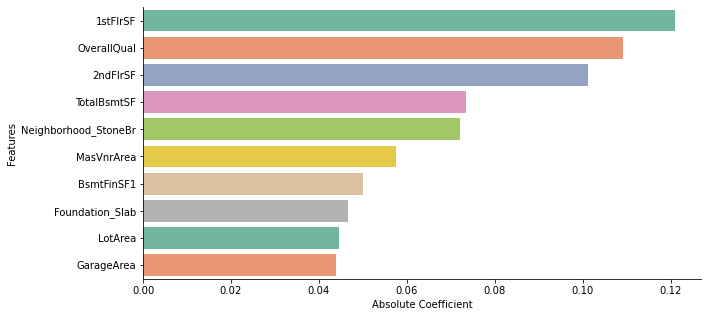

In [183]:
# bar plot to determine the variables that would affect pricing most using ridge regression

ridge_temp_df_pos = ridge_temp_df.copy()
ridge_temp_df_pos['Coefficient'] = abs(ridge_temp_df_pos['Coefficient'] )

plt.figure(figsize=(10,5))
sns.barplot(y = 'Features', x='Coefficient', palette='Set2', data = ridge_temp_df_pos.head(10)).set(xlabel='Absolute Coefficient')
sns.despine()
plt.show()

### Looking at Training and Testing R2 Score

In [184]:
ridge = Ridge(alpha=1)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print("Training R2 Score: ",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Testing R2 Score : ",r2_score(y_true=y_test,y_pred=y_test_pred))

Training R2 Score:  0.8839441626828742
Testing R2 Score :  0.8899934675431003


In [185]:
## Training and Testing accuracy are close. Therefore, no overfitting is present.

In [186]:
# Adj. RSquared for Train
1-(1-r2_score(y_train, y_train_pred))*((len(X_train)-1)/(len(X_train)-len(X_train.columns)-1))

0.878129256428989

In [187]:
# Adj. RSquared for Test
1-(1-r2_score(y_test, y_test_pred))*((len(X_test)-1)/(len(X_test)-len(X_test.columns)-1))

0.8762067480706951

### Observation: 

- **Adj-R-squared Train DataSet**: The model is able to explain 87.55% of variance in data. 
    
- **Adj-R-squared Test DataSet**: The model is able to explain 87.33% of variance in data.     

In [188]:
## Ridge Coefficients

ridge_temp_df[["Features","Coefficient"]]

,Features,Coefficient
6,1stFlrSF,0.1208
1,OverallQual,0.1090
7,2ndFlrSF,0.1011
5,TotalBsmtSF,0.0735
26,Neighborhood_StoneBr,0.0720
3,MasVnrArea,0.0576
4,BsmtFinSF1,0.0499
28,Foundation_Slab,0.0465
0,LotArea,0.0446
13,GarageArea,0.0438


## LASSO

In [189]:
lasso = Lasso()

# list of alphas

# params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
#                     9.0, 10.0, 20, 50, 100, 500, 1000 ]}


params ={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]} 
#Commented the first params because it gives same optimum alpha of 0.0001 but this range gives better resulting graph



# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.3s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [190]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-0.023723,-0.025817,1
1,0.0002,-0.024179,-0.026173,2
2,0.0003,-0.024746,-0.026578,3
3,0.0004,-0.025175,-0.026874,4
4,0.0005,-0.025494,-0.027093,5
5,0.001,-0.027235,-0.028401,6
6,0.002,-0.030211,-0.031097,7
7,0.003,-0.034245,-0.034983,8
8,0.004,-0.039161,-0.039758,9
9,0.005,-0.043514,-0.043892,10


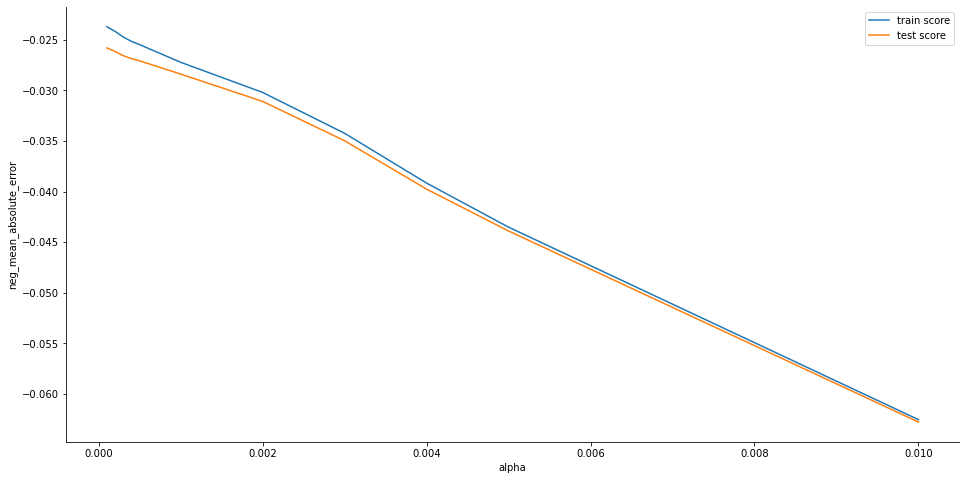

In [191]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting
plt.figure(figsize=(16,8))
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('neg_mean_absolute_error')

sns.despine()
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [192]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0001)

In [193]:
# check the coefficient values with lambda = 0.0001

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 3.88211950e-02,  1.19944558e-01,  2.94508884e-02,  5.41186401e-02,
        5.03492801e-02,  6.41118658e-02,  1.52778982e-01,  1.12959534e-01,
        1.66810809e-02,  1.19695019e-02, -1.99118584e-02, -6.19552720e-02,
        2.07354911e-02,  3.31239227e-02,  2.71356643e-02,  4.05765013e-02,
        1.85673430e-02,  2.14840931e-02, -1.45762388e-02,  4.00040613e-02,
        2.94249803e-02,  3.57944875e-02,  3.36046718e-02, -1.75859042e-02,
       -2.75147133e-02, -8.59840407e-03, -3.32842632e-02,  3.17500560e-02,
       -9.56525083e-03, -1.05388950e-02,  0.00000000e+00,  5.34253441e-02,
        5.18816612e-02, -1.46332812e-02,  2.13349954e-02,  6.78481956e-02,
        1.24029005e-02, -1.43842992e-02,  8.78222167e-03,  8.75322522e-03,
        3.66558857e-02, -0.00000000e+00,  9.79514532e-03,  1.31952356e-02,
       -4.90835056e-03, -3.93291642e-03, -4.54022982e-05, -1.15803812e-02])

In [194]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.0012869440156888835

In [195]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(2)})

print("Shape before zero coefficients are removed: ",lasso_df.shape)

lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]

print("Shape after zero coefficients are removed:  ",lasso_df.shape)

lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Shape before zero coefficients are removed:  (48, 2)
Shape after zero coefficients are removed:   (43, 2)


,Features,Coefficient
0,LotArea,0.04
1,OverallQual,0.12
2,OverallCond,0.03
3,MasVnrArea,0.05
4,BsmtFinSF1,0.05
5,TotalBsmtSF,0.06
6,1stFlrSF,0.15
7,2ndFlrSF,0.11
8,FullBath,0.02
9,HalfBath,0.01


In [196]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'LotArea': 0.03882119498970558,
 'OverallQual': 0.11994455788196438,
 'OverallCond': 0.029450888371127113,
 'MasVnrArea': 0.054118640131669615,
 'BsmtFinSF1': 0.05034928012643263,
 'TotalBsmtSF': 0.0641118657801158,
 '1stFlrSF': 0.1527789818947559,
 '2ndFlrSF': 0.1129595337837456,
 'FullBath': 0.01668108087432692,
 'HalfBath': 0.01196950193990451,
 'BedroomAbvGr': -0.019911858398126734,
 'KitchenAbvGr': -0.061955272029565966,
 'TotRmsAbvGrd': 0.020735491085298218,
 'Fireplaces': 0.03312392274288212,
 'GarageCars': 0.027135664256039752,
 'GarageArea': 0.04057650127214693,
 'WoodDeckSF': 0.018567342950733434,
 'ScreenPorch': 0.021484093079301703,
 'BuiltOrRemodelAge': -0.014576238788606248,
 'dummy_ExterQual': 0.04000406129817404,
 'dummy_BsmtQual': 0.029424980289350918,
 'dummy_BsmtExposure': 0.03579448754172087,
 'dummy_KitchenQual': 0.033604671824886176,
 'dummy_HouseStyle': -0.017585904232966923,
 'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER': -0.027514713279975

In [197]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]


X_train_lasso = X_train[lasso_df.Features]


lasso_temp_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
lasso_temp_df = lasso_temp_df.loc[lasso_temp_df['rfe_support'] == True]
lasso_temp_df.reset_index(drop=True, inplace=True)

lasso_temp_df['Coefficient'] = lasso_temp_df['Features'].apply(find)
lasso_temp_df = lasso_temp_df.sort_values(by=['Coefficient'], ascending=False)
lasso_temp_df

,Features,rfe_support,rfe_ranking,Coefficient
6,1stFlrSF,True,1,0.152779
1,OverallQual,True,1,0.119945
7,2ndFlrSF,True,1,0.112960
25,Neighborhood_StoneBr,True,1,0.067848
5,TotalBsmtSF,True,1,0.064112
3,MasVnrArea,True,1,0.054119
23,Neighborhood_NoRidge,True,1,0.053425
4,BsmtFinSF1,True,1,0.050349
13,GarageArea,True,1,0.040577
17,dummy_ExterQual,True,1,0.040004


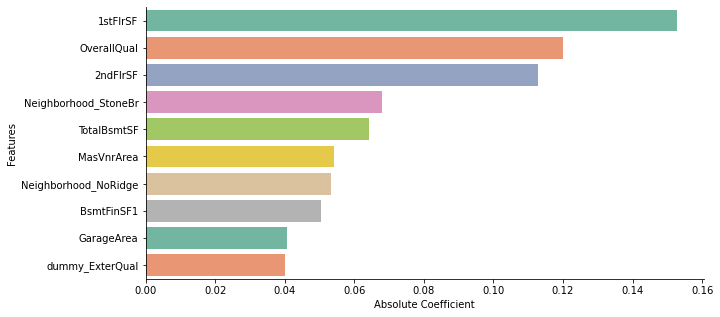

In [198]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(10,5))
lasso_temp_df_pos = lasso_temp_df.copy()
lasso_temp_df_pos['Coefficient'] = abs(lasso_temp_df_pos['Coefficient'] )

sns.barplot(y = 'Features', x='Coefficient', palette='Set2', data = lasso_temp_df_pos.head(10)).set(xlabel='Absolute Coefficient')
sns.despine()

plt.show()

In [199]:
### Looking at Training and Testing R2 scores

In [200]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)



y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("Training R2 Score: ",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Testing R2 Score : ",r2_score(y_true=y_test,y_pred=y_test_pred))

Training R2 Score:  0.8814520684347263
Testing R2 Score :  0.8874331565811


### Adjusted R-Squared

In [201]:
# Adj. RSquared for Train
1-(1-r2_score(y_train, y_train_pred))*((len(X_train)-1)/(len(X_train)-len(X_train.columns)-1))

0.8755122973333348

In [202]:
# Adj. RSquared for Test
1-(1-r2_score(y_test, y_test_pred))*((len(X_test)-1)/(len(X_test)-len(X_test.columns)-1))

0.8733255626278175

### Observation: 

- **Adj-R-squared Train DataSet**: The model is able to explain 87.55% of variance in data. 
    
- **Adj-R-squared Test DataSet**: The model is able to explain 87.33% of variance in data.     

## Lasso Coefficients

In [203]:
lasso_temp_df[["Features","Coefficient"]]

,Features,Coefficient
6,1stFlrSF,0.152779
1,OverallQual,0.119945
7,2ndFlrSF,0.112960
25,Neighborhood_StoneBr,0.067848
5,TotalBsmtSF,0.064112
3,MasVnrArea,0.054119
23,Neighborhood_NoRidge,0.053425
4,BsmtFinSF1,0.050349
13,GarageArea,0.040577
17,dummy_ExterQual,0.040004


# Conclusion
## Summary

**Ridge Top 5 predictors**: 
    - 1stFlrSF\
    - OverallQual\
    - 2ndFlrSF\
    - TotalBsmtSF\
    - Neighborhood_StoneBr\
\
\
**Ridge r2 score**:\
    - train: 0.8839\
    - test : 0.8899\
\
\
**Ridge Mean Square Error**:
     0.001257
    

-----------------------------------
-----------------------------------

    
    
**Lasso Top 5 predictors**: 
    - 1stFlrSF\
    - OverallQual\
    - 2ndFlrSF\
    - Neighborhood_StoneBr\
    - TotalBsmtSF\
\
\
**Ridge r2 score**:\
    - **train**: 0.8814\
    - **test** : 0.8874\
\
\
**Ridge Mean Square Error**:
     0.0.0012869

## Ridge

In [204]:
## Ridge Coefficients ABSOLUTE VALUE

ridge_temp_df_pos[["Features","Coefficient"]].sort_values(by="Coefficient", ascending=False)

,Features,Coefficient
6,1stFlrSF,0.1208
1,OverallQual,0.1090
7,2ndFlrSF,0.1011
11,KitchenAbvGr,0.0758
5,TotalBsmtSF,0.0735
26,Neighborhood_StoneBr,0.0720
3,MasVnrArea,0.0576
4,BsmtFinSF1,0.0499
28,Foundation_Slab,0.0465
0,LotArea,0.0446


## Lasso

In [205]:
# Lasso Coefficients ABSOLUTE VALUE

lasso_temp_df_pos[["Features","Coefficient"]].sort_values(by="Coefficient", ascending=False)

,Features,Coefficient
6,1stFlrSF,0.152779
1,OverallQual,0.119945
7,2ndFlrSF,0.112960
25,Neighborhood_StoneBr,0.067848
5,TotalBsmtSF,0.064112
11,KitchenAbvGr,0.061955
3,MasVnrArea,0.054119
23,Neighborhood_NoRidge,0.053425
4,BsmtFinSF1,0.050349
13,GarageArea,0.040577


------------------------------------------------------------------------
------------------------------------------------------------------------
------------------------------------------------------------------------

# Subjective Questions

In [206]:
# Question 1: Doubling the Alpha value for Ridge and Lasso

### Doubling Alpha for Ridge

In [207]:
X_train.shape

(1007, 48)

In [208]:
# check the coefficient values with lambda = 1*2

ridge = Ridge(alpha=1*2)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.04245098,  0.10414147,  0.03361296,  0.05683285,  0.05058207,
        0.07183603,  0.10808719,  0.09179482,  0.02679538,  0.01627899,
       -0.02853575, -0.06218371,  0.04995725,  0.04877518,  0.03057805,
        0.04443037,  0.02269367,  0.02696924, -0.01429366,  0.04256888,
        0.03349379,  0.03690739,  0.03465569, -0.01888915, -0.0286453 ,
       -0.00936511, -0.0351043 ,  0.03419561, -0.01120601, -0.01592947,
        0.01519313,  0.05750309,  0.05184008, -0.01408745,  0.0232945 ,
        0.06879981,  0.01825786, -0.0180587 ,  0.01560654,  0.01432963,
        0.04198829, -0.02433985,  0.01231849,  0.01630829, -0.01635319,
       -0.00960325, -0.0140492 , -0.01735908])

In [209]:
# Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.0012766994903318455

In [210]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
print("Ridge DataFrame Shape:", ridge_df.shape)
ridge_df.head(10)

Ridge DataFrame Shape: (48, 2)


,Features,Coefficient
0,LotArea,0.0425
1,OverallQual,0.1041
2,OverallCond,0.0336
3,MasVnrArea,0.0568
4,BsmtFinSF1,0.0506
5,TotalBsmtSF,0.0718
6,1stFlrSF,0.1081
7,2ndFlrSF,0.0918
8,FullBath,0.0268
9,HalfBath,0.0163


In [211]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'LotArea': 0.0425,
 'OverallQual': 0.1041,
 'OverallCond': 0.0336,
 'MasVnrArea': 0.0568,
 'BsmtFinSF1': 0.0506,
 'TotalBsmtSF': 0.0718,
 '1stFlrSF': 0.1081,
 '2ndFlrSF': 0.0918,
 'FullBath': 0.0268,
 'HalfBath': 0.0163,
 'BedroomAbvGr': -0.0285,
 'KitchenAbvGr': -0.0622,
 'TotRmsAbvGrd': 0.05,
 'Fireplaces': 0.0488,
 'GarageCars': 0.0306,
 'GarageArea': 0.0444,
 'WoodDeckSF': 0.0227,
 'ScreenPorch': 0.027,
 'BuiltOrRemodelAge': -0.0143,
 'dummy_ExterQual': 0.0426,
 'dummy_BsmtQual': 0.0335,
 'dummy_BsmtExposure': 0.0369,
 'dummy_KitchenQual': 0.0347,
 'dummy_HouseStyle': -0.0189,
 'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER': -0.0286,
 'MSSubClass_2-STORY 1945 & OLDER': -0.0094,
 'MSSubClass_2-STORY PUD - 1946 & NEWER': -0.0351,
 'Neighborhood_Crawfor': 0.0342,
 'Neighborhood_Edwards': -0.0112,
 'Neighborhood_IDOTRR': -0.0159,
 'Neighborhood_NPkVill': 0.0152,
 'Neighborhood_NoRidge': 0.0575,
 'Neighborhood_NridgHt': 0.0518,
 'Neighborhood_OldTown': -0.0141,
 'Ne

In [212]:
X_train_ridge = X_train[ridge_df.Features]

In [213]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign features to a temp dataframe for further display in the bar plot

ridge_temp_dfQ = pd.DataFrame(list(zip( X_train.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
ridge_temp_dfQ = ridge_temp_dfQ.loc[ridge_temp_dfQ['rfe_support'] == True]
ridge_temp_dfQ.reset_index(drop=True, inplace=True)

ridge_temp_dfQ['Coefficient'] = ridge_temp_dfQ['Features'].apply(find)
ridge_temp_dfQ = ridge_temp_dfQ.sort_values(by=['Coefficient'], ascending=False)
ridge_temp_dfQ.head(10)

,Features,rfe_support,rfe_ranking,Coefficient
6,1stFlrSF,True,1,0.1081
1,OverallQual,True,1,0.1041
7,2ndFlrSF,True,1,0.0918
5,TotalBsmtSF,True,1,0.0718
26,Neighborhood_StoneBr,True,1,0.0688
3,MasVnrArea,True,1,0.0568
4,BsmtFinSF1,True,1,0.0506
13,GarageArea,True,1,0.0444
17,dummy_ExterQual,True,1,0.0426
0,LotArea,True,1,0.0425


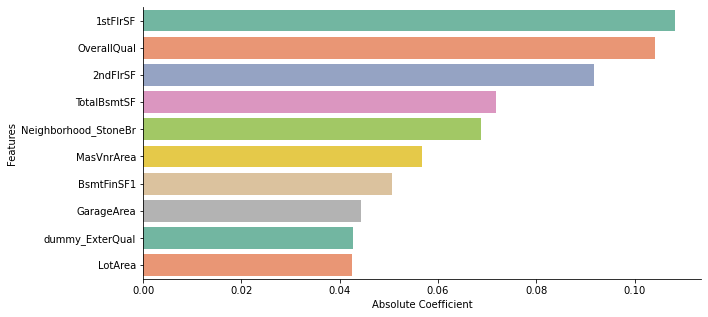

In [214]:
# bar plot to determine the variables that would affect pricing most using ridge regression

ridge_temp_df_posQ = ridge_temp_dfQ.copy()
ridge_temp_df_posQ['Coefficient'] = abs(ridge_temp_df_posQ['Coefficient'] )

plt.figure(figsize=(10,5))
sns.barplot(y = 'Features', x='Coefficient', palette='Set2', data = ridge_temp_df_posQ.head(10)).set(xlabel='Absolute Coefficient')
sns.despine()
plt.show()

In [215]:
ridge = Ridge(alpha=1*2)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print("Training R2 Score: ",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Testing R2 Score : ",r2_score(y_true=y_test,y_pred=y_test_pred))

Training R2 Score:  0.8825654275291785
Testing R2 Score :  0.8883292281022449


In [216]:
ridge_temp_df_posQ[["Features","Coefficient"]].sort_values(by="Coefficient", ascending=False)

,Features,Coefficient
6,1stFlrSF,0.1081
1,OverallQual,0.1041
7,2ndFlrSF,0.0918
5,TotalBsmtSF,0.0718
26,Neighborhood_StoneBr,0.0688
11,KitchenAbvGr,0.0622
3,MasVnrArea,0.0568
4,BsmtFinSF1,0.0506
13,GarageArea,0.0444
17,dummy_ExterQual,0.0426


### Doubling Alpha for Lasso

In [217]:
# check the coefficient values with lambda = 0.0001

alpha = 0.0001*2

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.02948765,  0.12621218,  0.02031066,  0.0503357 ,  0.05078528,
        0.05415936,  0.16228748,  0.11162456,  0.0138668 ,  0.01218186,
       -0.        , -0.03036591,  0.        ,  0.02874451,  0.02520489,
        0.03863221,  0.01739135,  0.01500976, -0.01594392,  0.04368849,
        0.02310344,  0.03583305,  0.0370906 , -0.01582587, -0.02511183,
       -0.00363272, -0.03118614,  0.02752022, -0.00695745, -0.00410091,
        0.        ,  0.05032827,  0.04986934, -0.01466798,  0.0175387 ,
        0.06065596,  0.00156355, -0.00905635,  0.0014104 ,  0.00279192,
        0.02135214, -0.        ,  0.0085512 ,  0.00705364, -0.        ,
        0.        , -0.        , -0.00708288])

In [218]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))


0.0013563030101358712

In [219]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(2)})

print("Shape before zero coefficients are removed: ",lasso_df.shape)

lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]

print("Shape after zero coefficients are removed:  ",lasso_df.shape)

lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Shape before zero coefficients are removed:  (48, 2)
Shape after zero coefficients are removed:   (36, 2)


,Features,Coefficient
0,LotArea,0.03
1,OverallQual,0.13
2,OverallCond,0.02
3,MasVnrArea,0.05
4,BsmtFinSF1,0.05
5,TotalBsmtSF,0.05
6,1stFlrSF,0.16
7,2ndFlrSF,0.11
8,FullBath,0.01
9,HalfBath,0.01


### Note
When alpha was 0.0001, 5 features were removed. When alpha is 0.0002, 12 features are pruned

In [220]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'LotArea': 0.029487646755584615,
 'OverallQual': 0.12621218229328687,
 'OverallCond': 0.020310655914511033,
 'MasVnrArea': 0.05033569680281835,
 'BsmtFinSF1': 0.05078527976466276,
 'TotalBsmtSF': 0.054159360697824455,
 '1stFlrSF': 0.16228748411688504,
 '2ndFlrSF': 0.11162456375859889,
 'FullBath': 0.013866801368982377,
 'HalfBath': 0.012181858181600263,
 'BedroomAbvGr': -0.0,
 'KitchenAbvGr': -0.030365914737347954,
 'TotRmsAbvGrd': 0.0,
 'Fireplaces': 0.02874450580560911,
 'GarageCars': 0.02520489434535971,
 'GarageArea': 0.03863220985180542,
 'WoodDeckSF': 0.017391346936263888,
 'ScreenPorch': 0.015009756587311887,
 'BuiltOrRemodelAge': -0.015943924587521623,
 'dummy_ExterQual': 0.043688485813429115,
 'dummy_BsmtQual': 0.023103439781236544,
 'dummy_BsmtExposure': 0.035833048876980376,
 'dummy_KitchenQual': 0.037090599083829,
 'dummy_HouseStyle': -0.01582586784202364,
 'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER': -0.025111831728748986,
 'MSSubClass_2-STORY 1945 

In [221]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]


X_train_lasso = X_train[lasso_df.Features]


lasso_temp_dfQ = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
lasso_temp_dfQ = lasso_temp_dfQ.loc[lasso_temp_dfQ['rfe_support'] == True]
lasso_temp_dfQ.reset_index(drop=True, inplace=True)

lasso_temp_dfQ['Coefficient'] = lasso_temp_dfQ['Features'].apply(find)
lasso_temp_dfQ = lasso_temp_dfQ.sort_values(by=['Coefficient'], ascending=False)
lasso_temp_dfQ

,Features,rfe_support,rfe_ranking,Coefficient
6,1stFlrSF,True,1,0.162287
1,OverallQual,True,1,0.126212
7,2ndFlrSF,True,1,0.111625
23,Neighborhood_StoneBr,True,1,0.060656
5,TotalBsmtSF,True,1,0.054159
4,BsmtFinSF1,True,1,0.050785
3,MasVnrArea,True,1,0.050336
22,Neighborhood_NoRidge,True,1,0.050328
15,dummy_ExterQual,True,1,0.043688
18,dummy_KitchenQual,True,1,0.037091


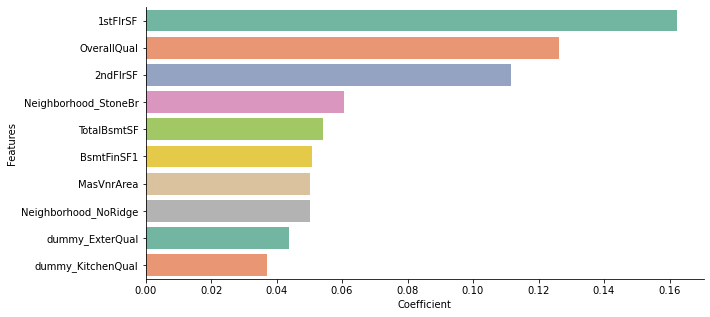

In [222]:
# bar plot to determine the variables that would affect pricing most using ridge regression

lasso_temp_dfQ_pos = lasso_temp_dfQ.copy()
lasso_temp_dfQ_pos['Coefficient'] = abs(lasso_temp_dfQ_pos['Coefficient'] )

plt.figure(figsize=(10,5))
sns.barplot(y = 'Features', x='Coefficient', palette='Set2', data = lasso_temp_dfQ_pos.head(10))
sns.despine()
plt.show()

In [223]:
lasso = Lasso(alpha=0.0002)
lasso.fit(X_train,y_train)



y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("Training R2 Score: ",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Testing R2 Score : ",r2_score(y_true=y_test,y_pred=y_test_pred))

Training R2 Score:  0.8763450134589478
Testing R2 Score :  0.8813664411898892


In [224]:
lasso_temp_dfQ_pos[["Features","Coefficient"]].sort_values(by="Coefficient", ascending=False)

,Features,Coefficient
6,1stFlrSF,0.162287
1,OverallQual,0.126212
7,2ndFlrSF,0.111625
23,Neighborhood_StoneBr,0.060656
5,TotalBsmtSF,0.054159
4,BsmtFinSF1,0.050785
3,MasVnrArea,0.050336
22,Neighborhood_NoRidge,0.050328
15,dummy_ExterQual,0.043688
18,dummy_KitchenQual,0.037091


## Question 3

In [225]:
### Recreating the model by excluding the top 5 predictor from Lasso

In [226]:
## Looking at our top 5 features for Lasso
lasso_temp_df_pos.sort_values(by="Coefficient", ascending=False)[0:5]

,Features,rfe_support,rfe_ranking,Coefficient
6,1stFlrSF,True,1,0.152779
1,OverallQual,True,1,0.119945
7,2ndFlrSF,True,1,0.112960
25,Neighborhood_StoneBr,True,1,0.067848
5,TotalBsmtSF,True,1,0.064112


In [227]:
X_train_dummy = X_train.copy()

In [228]:
X_train_dummy.drop("1stFlrSF", axis=1, inplace=True)
X_train_dummy.drop("OverallQual", axis=1, inplace=True)
X_train_dummy.drop("2ndFlrSF", axis=1, inplace=True)
X_train_dummy.drop("Neighborhood_StoneBr", axis=1, inplace=True)
X_train_dummy.drop("TotalBsmtSF", axis=1, inplace=True)

In [229]:
# check the coefficient values with lambda = 0.0001

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_dummy, y_train) 


Lasso(alpha=0.0001)

In [230]:
X_test_dummy = X_test.copy()

X_test_dummy.drop("1stFlrSF", axis=1, inplace=True)
X_test_dummy.drop("OverallQual", axis=1, inplace=True)
X_test_dummy.drop("2ndFlrSF", axis=1, inplace=True)
X_test_dummy.drop("Neighborhood_StoneBr", axis=1, inplace=True)
X_test_dummy.drop("TotalBsmtSF", axis=1, inplace=True)

In [231]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test_dummy))

0.001690180872429616

In [232]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train_dummy.columns, 'Coefficient':lasso.coef_.round(2)})

print("Shape before zero coefficients are removed: ",lasso_df.shape)

lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]

print("Shape after zero coefficients are removed:  ",lasso_df.shape)

lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Shape before zero coefficients are removed:  (43, 2)
Shape after zero coefficients are removed:   (38, 2)


,Features,Coefficient
0,LotArea,0.06
1,OverallCond,0.04
2,MasVnrArea,0.08
3,BsmtFinSF1,0.07
4,FullBath,0.06
5,HalfBath,0.03
6,BedroomAbvGr,-0.01
7,KitchenAbvGr,-0.09
8,TotRmsAbvGrd,0.16
9,Fireplaces,0.07


In [233]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train_dummy.columns))
lasso_coeff_dict

{'LotArea': 0.06163615362877998,
 'OverallCond': 0.03509885737038285,
 'MasVnrArea': 0.08268997232289957,
 'BsmtFinSF1': 0.06639745681476948,
 'FullBath': 0.06370648433256669,
 'HalfBath': 0.03126867595553377,
 'BedroomAbvGr': -0.0050669753067497545,
 'KitchenAbvGr': -0.08887915456108912,
 'TotRmsAbvGrd': 0.1574506970196161,
 'Fireplaces': 0.06767648087989674,
 'GarageCars': 0.024727088061071774,
 'GarageArea': 0.07802563486395356,
 'WoodDeckSF': 0.023289293650557607,
 'ScreenPorch': 0.030890174000553966,
 'BuiltOrRemodelAge': -0.007714264429415946,
 'dummy_ExterQual': 0.07855578855526608,
 'dummy_BsmtQual': 0.06896537794862946,
 'dummy_BsmtExposure': 0.045067491779824255,
 'dummy_KitchenQual': 0.057100628685168874,
 'dummy_HouseStyle': -0.02475692942105315,
 'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER': -0.009023120965411812,
 'MSSubClass_2-STORY 1945 & OLDER': 0.0,
 'MSSubClass_2-STORY PUD - 1946 & NEWER': -0.025275365532883187,
 'Neighborhood_Crawfor': 0.032857

In [234]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]


X_train_lasso = X_train_dummy[lasso_df.Features]


lasso_temp_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
lasso_temp_df = lasso_temp_df.loc[lasso_temp_df['rfe_support'] == True]
lasso_temp_df.reset_index(drop=True, inplace=True)

lasso_temp_df['Coefficient'] = lasso_temp_df['Features'].apply(find)
lasso_temp_df = lasso_temp_df.sort_values(by=['Coefficient'], ascending=False)
lasso_temp_df

,Features,rfe_support,rfe_ranking,Coefficient
8,TotRmsAbvGrd,True,1,0.157451
2,MasVnrArea,True,1,0.082690
13,dummy_ExterQual,True,1,0.078556
11,GarageArea,True,1,0.078026
21,Neighborhood_NoRidge,True,1,0.072516
14,dummy_BsmtQual,True,1,0.068965
9,Fireplaces,True,1,0.067676
3,BsmtFinSF1,True,1,0.066397
4,FullBath,True,1,0.063706
0,LotArea,True,1,0.061636


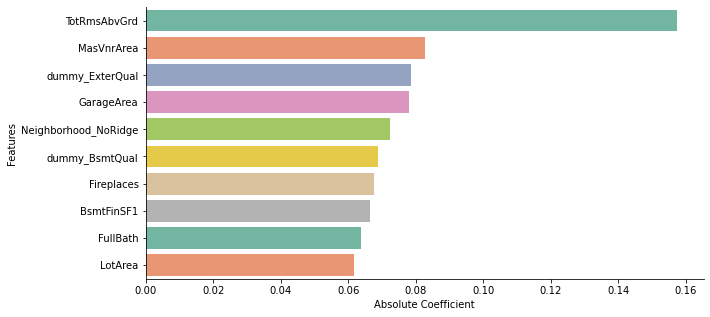

In [235]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(10,5))
lasso_temp_df_pos = lasso_temp_df.copy()
lasso_temp_df_pos['Coefficient'] = abs(lasso_temp_df_pos['Coefficient'] )

sns.barplot(y = 'Features', x='Coefficient', palette='Set2', data = lasso_temp_df_pos.head(10)).set(xlabel='Absolute Coefficient')
sns.despine()

plt.show()

In [236]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train_dummy,y_train)



y_train_pred = lasso.predict(X_train_dummy)
y_test_pred = lasso.predict(X_test_dummy)

print("Training R2 Score: ",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Testing R2 Score : ",r2_score(y_true=y_test,y_pred=y_test_pred))

Training R2 Score:  0.8459580772738972
Testing R2 Score :  0.8521627022644325


In [237]:
lasso_temp_df[['Features','Coefficient']][0:5]

,Features,Coefficient
8,TotRmsAbvGrd,0.157451
2,MasVnrArea,0.082690
13,dummy_ExterQual,0.078556
11,GarageArea,0.078026
21,Neighborhood_NoRidge,0.072516
